# Leanding Club Case Study

Imports and basic set-up

In [1]:
import warnings
from os import getcwd
from os.path import join

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
sns.set_style('darkgrid')
# plt.style.use('seaborn-v0_8-pastel')

In [3]:
PRJ_DIR = getcwd()
DATA_DIR = join(PRJ_DIR, 'data')

## Step 0: Reading data

In [4]:
df = pd.read_csv(join(DATA_DIR, 'loan.csv'))
df.head(10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term   
0  1077501    1296599       5000         5000           4975.0   36 months  \
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   
8  1071795    1306957       5600         5600           5600.0   60 months   
9  1071570    1306721       5375         5375           5350.0   60 months   

  int_rate  installment grade sub_grade                  emp_title emp_length   
0   10.65%       162.87     B        B2                        NaN  10+ years  \
1   15.27%        59.83     C        C4                      Ryder   < 1 year   
2   15.96%        84.33     C        C5                        NaN  10+ years   
3   13.49%       339.31     C        C1        AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5   University Medical Group     1 year   
5    7.90%       156.46     A        A4       Veolia Transportaton    3 years   
6   15.96%       170.08     C        C5  Southern Star Photography    8 years   
7   18.64%       109.43     E        E1            MKC Accounting     9 years   
8   21.28%       152.39     F        F2                        NaN    4 years   
9   12.69%       121.45     B        B5                  Starbucks   < 1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status   
0           RENT     24000.0            Verified  Dec-11   Fully Paid  \
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   
5           RENT     36000.0     Source Verified  Dec-11   Fully Paid   
6           RENT     47004.0        Not Verified  Dec-11   Fully Paid   
7           RENT     48000.0     Source Verified  Dec-11   Fully Paid   
8            OWN     40000.0     Source Verified  Dec-11  Charged Off   
9           RENT     15000.0            Verified  Dec-11  Charged Off   

  pymnt_plan   
0          n  \
1          n   
2          n   
3          n   
4          n   
5          n   
6          n   
7          n   
8          n   
9          n   

                                                                url   
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501  \
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  https://lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=1075358   
5  https://lendingclub.com/browse/loanDetail.action?loan_id=1075269   
6  https://lendingclub.com/browse/loanDetail.action?loan_id=1069639   
7  https://lendingclub.com/browse/loanDetail.action?loan_id=1072053   
8  https://lendingclub.com/browse/loanDetail.action?loan_id=1071795   
9  https://lendingclub.com/browse/loanDetail.action?loan_id=1071570   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [5]:
data_dict = pd.read_excel(join(DATA_DIR, 'Data_Dictionary.xlsx'))
data_dict = data_dict.dropna()
data_dict.sample(5)

LoanStatNew   
19            emp_length  \
76           open_il_24m   
1   acc_open_past_24mths   
9                bc_util   
27                    id   

                                                                                                                           Description  
19  Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.   
76                                                                             Number of installment accounts opened in past 24 months  
1                                                                                           Number of trades opened in past 24 months.  
9                                                Ratio of total current balance to high credit/credit limit for all bankcard accounts.  
27                                                                                       A unique LC assigned ID for the loan listing.

## Step 1: Cleaning

### Choosing columns
There are columns with `Nan` values.

In [6]:
df.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


As seen above, there are columns which do not contain any values. Some of the columns contain not but few values.

In [7]:
(df.isna().sum() >= 0.6 * df.shape[0]).sum()

57

57 columns have more than 60% vlues as null. I am choosing not to use them and dropping them from analysis.

In [8]:
column_names = df.columns[df.isna().sum() <= 0.60 * df.shape[0]].tolist()
data_df = df[column_names]
del df
data_df.sample(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv   
4039   1003208    1229563      20000        20000          20000.0  \
33302   462259     578163      15000        15000          14925.0   
28233   541249     698665       8000         8000           8000.0   

             term int_rate  installment grade sub_grade       emp_title   
4039    60 months   19.03%       519.15     E        E2             NaN  \
33302   36 months   16.70%       532.53     E        E2             NaN   
28233   36 months   11.49%       263.78     B        B4  Pierce County    

      emp_length home_ownership  annual_inc verification_status issue_d   
4039         NaN       MORTGAGE     68232.0            Verified  Nov-11  \
33302   < 1 year           RENT     60225.0        Not Verified  Dec-09   
28233  10+ years       MORTGAGE     72000.0        Not Verified  Jul-10   

       loan_status pymnt_plan   
4039    Fully Paid          n  \
33302  Charged Off          n   
28233   Fully Paid          n   

                                                                    url   
4039   https://lendingclub.com/browse/loanDetail.action?loan_id=1003208  \
33302   https://lendingclub.com/browse/loanDetail.action?loan_id=462259   
28233   https://lendingclub.com/browse/loanDetail.action?loan_id=541249   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        desc   
4039                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

Another thing to check in the remaining column is the numbeor of unique values found in the each column

In [9]:
data_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

There are columns which contain only 1 value for all the rows. We are choosing not to use them either as they are not adding any information wrt to our target variable

In [10]:
(data_df.nunique() <= 1).sum()

9

9 columns will be additionally removed from our analysis.

In [11]:
column_names = data_df.columns[data_df.nunique() > 1]
data_df = data_df[column_names]
data_df.sample(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv   
33230   471062     594703       5000         5000      5000.000000  \
32633   479786     609713       9000         9000      8778.894546   
2278   1038330    1268236      23600        23600     23600.000000   

             term int_rate  installment grade sub_grade   
33230   36 months   12.18%       166.50     B        B4  \
32633   36 months    7.14%       278.46     A        A3   
2278    60 months   18.64%       607.54     E        E1   

                     emp_title emp_length home_ownership  annual_inc   
33230  concessions/paschals,jv    2 years           RENT     23000.0  \
32633          TomoTherapy Inc    4 years       MORTGAGE     99000.0   
2278                  Texsport  10+ years            OWN     60000.0   

      verification_status issue_d loan_status   
33230        Not Verified  Dec-09  Fully Paid  \
32633        Not Verified  Jan-10  Fully Paid   
2278             Verified  Dec-11     Current   

                                                                    url   
33230   https://lendingclub.com/browse/loanDetail.action?loan_id=471062  \
32633   https://lendingclub.com/browse/loanDetail.action?loan_id=479786   
2278   https://lendingclub.com/browse/loanDetail.action?loan_id=1038330   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         desc   
33230                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Borrower added on 12/22/09 > I would rather pay you the interest than the credit card company,  I have a second job that pays my with free rent so my living expenses are very low.  My job is very stable. I am a volunteer at the local humain society. Happy Holidays! Thank you!<br/>  \
32633                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Borrower added on 01/26/10 > Personal loan<br/>   
2278     Borrower added on 11/23/11 > This loan is to get out of credit card debt, significant student loans, and some past medical bills. I feel like I've been paying and paying on these without making a significant dent. I do not like to feel in debt to &quot;many people&quot;. This loan will consolidate my debt and make repayment to ONE company much easier for myself and family. I've been worki

In [12]:
column_desc_df = pd.DataFrame([(i, data_df[i].isna().sum(),
                                data_df[i].nunique(),
                                data_dict[data_dict.LoanStatNew == i]['Description'].values[0])
                               for i in data_df.columns],
                              columns=['Column_Name', 'Num_NAs',
                                       'Num_unique_vals', 'Description'])
column_desc_df

Column_Name  Num_NAs  Num_unique_vals   
0                        id        0            39717  \
1                 member_id        0            39717   
2                 loan_amnt        0              885   
3               funded_amnt        0             1041   
4           funded_amnt_inv        0             8205   
5                      term        0                2   
6                  int_rate        0              371   
7               installment        0            15383   
8                     grade        0                7   
9                 sub_grade        0               35   
10                emp_title     2459            28820   
11               emp_length     1075               11   
12           home_ownership        0                5   
13               annual_inc        0             5318   
14      verification_status        0                3   
15                  issue_d        0               55   
16              loan_status        0                3   
17                      url        0            39717   
18                     desc    12942            26526   
19                  purpose        0               14   
20                    title       11            19615   
21                 zip_code        0              823   
22               addr_state        0               50   
23                      dti        0             2868   
24              delinq_2yrs        0               11   
25         earliest_cr_line        0              526   
26           inq_last_6mths        0                9   
27                 open_acc        0               40   
28                  pub_rec        0                5   
29                revol_bal        0            21711   
30               revol_util       50             1089   
31                total_acc        0               82   
32                out_prncp        0             1137   
33            out_prncp_inv        0             1138   
34              total_pymnt        0            37850   
35          total_pymnt_inv        0            37518   
36          total_rec_prncp        0             7976   
37            total_rec_int        0            35148   
38       total_rec_late_fee        0             1356   
39               recoveries        0             4040   
40  collection_recovery_fee        0             2616   
41             last_pymnt_d       71              101   
42          last_pymnt_amnt        0            34930   
43       last_credit_pull_d        2              106   
44     pub_rec_bankruptcies      697                3   

                                                                                                                                                                                                 Description  
0                                                                                                                                                              A unique LC assigned ID for the loan listing.  
1                                                                                                                                                           A unique LC assigned Id for the borrower member.  
2                               The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.  
3                                                                                                                                             The total amount committed to that loan at that point in time.  
4                                                                                                                               The total amount committed by investors for that loan at that point in time.  
5                                                                                                                       The number of payments on the l

In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [14]:
def get_earliest_yr(x):
    x = int(x.split("-")[1])
    if 0 <= x <= 11:
        return str(2000 + x)
    return str(1900 + x)

In [15]:
data_df['term'] = data_df.term.apply(lambda x: int(x.strip().split(' ')[0]))
data_df['int_rate'] = data_df.int_rate.apply(lambda x: float(x.strip().strip('%')))

data_df['issue_d_month'] = data_df.issue_d.apply(lambda x: x.split('-')[0])
data_df['issue_d_year'] = data_df.issue_d.apply(lambda x: "20" + x.split('-')[1])

data_df['earliest_cr_line_month'] = data_df.earliest_cr_line.apply(lambda x: x.split('-')[0])
data_df['earliest_cr_line_year'] = data_df.earliest_cr_line.apply(get_earliest_yr)

data_df['last_pymnt_d_month'] = data_df.last_pymnt_d.apply(lambda x: x.split('-')[0] if isinstance(x, str) else x)
data_df['last_pymnt_d_year'] = data_df.last_pymnt_d.apply(lambda x: "20" + x.split('-')[1] if isinstance(x, str) else x)

data_df['last_credit_pull_d_month'] = data_df.last_credit_pull_d.apply(lambda x: x.split('-')[0] if isinstance(x, str) else x)
data_df['last_credit_pull_d_year'] = data_df.last_credit_pull_d.apply(lambda x: "20" + x.split('-')[1] if isinstance(x, str) else x)

data_df['emp_title'] = data_df.emp_title.apply(lambda x: x.strip().upper() if not isinstance(x, float) else x)
data_df['emp_length'] = data_df.emp_length.apply(lambda x: x if '<' not in str(x) else '<1 year')
data_df['revol_util'] = data_df.revol_util.apply(lambda x: float(x.strip("%")) if isinstance(x, str) else float(x))
data_df['title'] = data_df.title.apply(lambda x: x.strip().lower() if not isinstance(x, float) else x)

In [16]:
data_df = data_df.drop(['issue_d', 'earliest_cr_line', 'url', 'last_pymnt_d', 'last_credit_pull_d', 'desc'], axis=1)

## Step 2: Uni-variate Analysis

### Annual Income

In [17]:
data_df.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

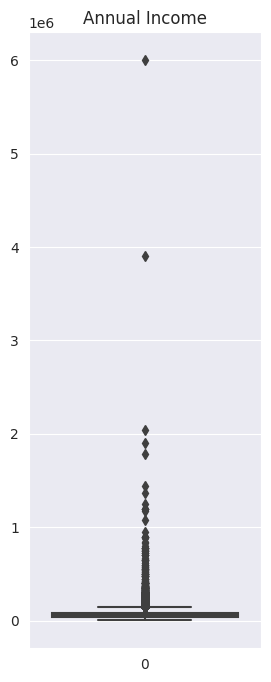

In [18]:
plt.figure(figsize=(3, 8))
sns.boxplot(data_df.annual_inc)
plt.title('Annual Income')
plt.show()

Here we encounter some outliers. It is evident from the 5 point summary that 75% of the annual incomes are below USD 100K, but the highest income is USD 6M. Analyzing this columns while considering all the values would not yield correct results and therefore we choose drop rows where the annual income is greater than USD 150K.

In [19]:
data_df = data_df[(data_df.annual_inc <= 150_000)]
data_df.annual_inc.describe()

count     38166.000000
mean      62034.776686
std       29133.956592
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       79200.000000
max      150000.000000
Name: annual_inc, dtype: float64

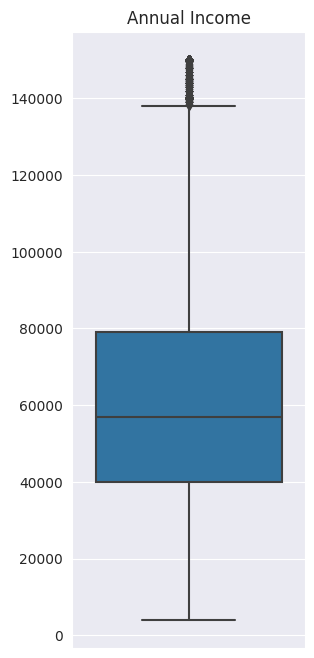

In [20]:
plt.figure(figsize=(3, 8))
sns.boxplot(data_df.annual_inc)
plt.title('Annual Income')
plt.xticks(ticks=[])
plt.show()

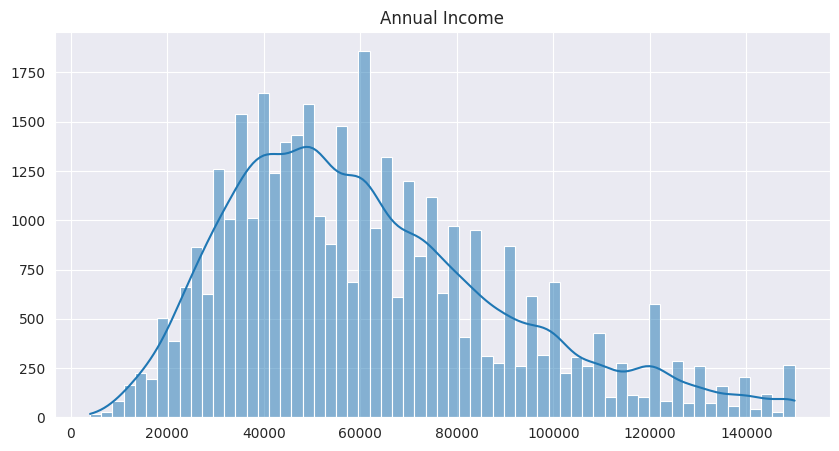

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(data_df.annual_inc, kde=True)
plt.title('Annual Income')
plt.xlabel("")
plt.ylabel("")
plt.show()

We observe that:
- The median annual income is USD 57K
- Income of most of the applicants lie below USD 80K

### Last Payment Amount

In [22]:
data_df.last_pymnt_amnt.describe()

count    38166.000000
mean      2591.608608
std       4300.622286
min          0.000000
25%        214.462500
50%        528.175000
75%       3201.652500
max      36115.200000
Name: last_pymnt_amnt, dtype: float64

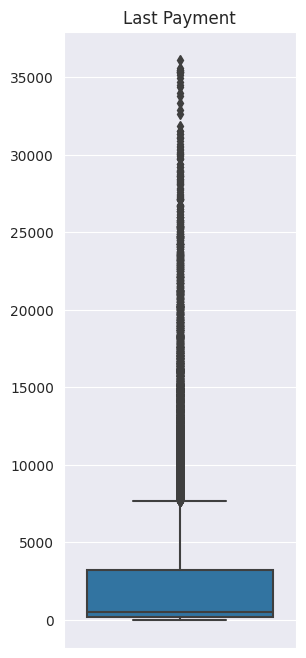

In [23]:
plt.figure(figsize=(3, 8))
sns.boxplot(data_df.last_pymnt_amnt)
plt.title('Last Payment')
plt.xticks(ticks=[])
plt.show()

Here we encounter some outliers. It is evident from the 5 point summary that 75% of the loan payment amounts are around USD 3200, but the highest income is around USD 36K. Analyzing this columns while considering all the values would not yield correct results and therefore we choose drop rows where the annual income is greater than USD 150K.

In [24]:
data_df = data_df[(data_df.last_pymnt_amnt <= 8000)]
data_df.last_pymnt_amnt.describe()

count    34307.000000
mean      1394.188342
std       1905.199772
min          0.000000
25%        194.560000
50%        430.140000
75%       1919.680000
max       7998.750000
Name: last_pymnt_amnt, dtype: float64

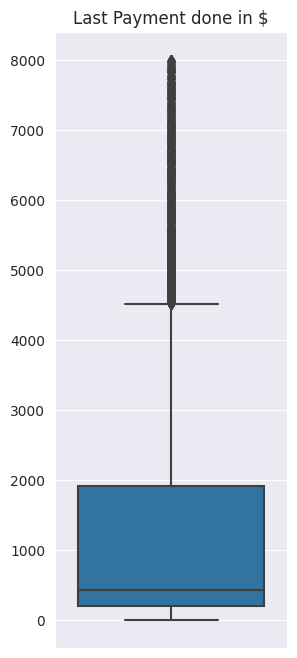

In [25]:
plt.figure(figsize=(3, 8))
sns.boxplot(data_df.last_pymnt_amnt)
plt.title('Last Payment done in $')
plt.xticks(ticks=[])
plt.show()

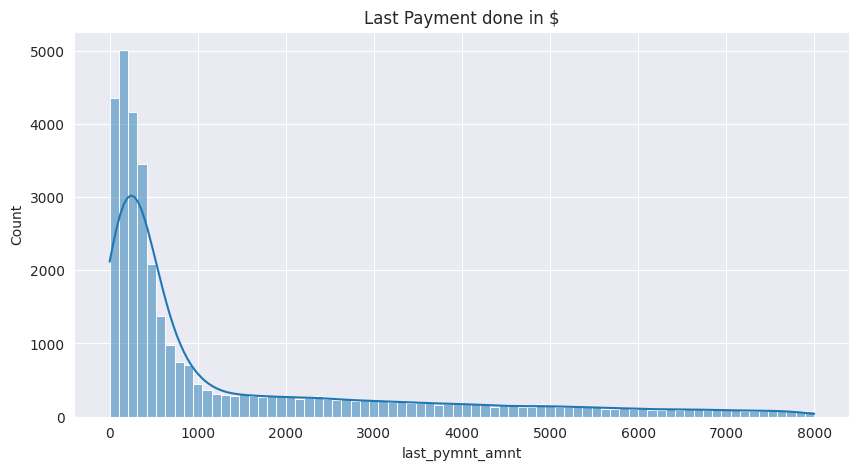

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(data_df.last_pymnt_amnt, kde=True)
plt.title('Last Payment done in $')
plt.show()

We observe that:
- More than 50% of the amount paid as the latest payment is less than $500

### Loan Status

In [27]:
data_df.loan_status.value_counts()

loan_status
Fully Paid     27777
Charged Off     5455
Current         1075
Name: count, dtype: int64

In [28]:
data_df = data_df[data_df.loan_status.isin(['Fully Paid', 'Charged Off'])]

In [29]:
data_df.loan_status.value_counts() / data_df.loan_status.value_counts().sum()

loan_status
Fully Paid     0.835851
Charged Off    0.164149
Name: count, dtype: float64

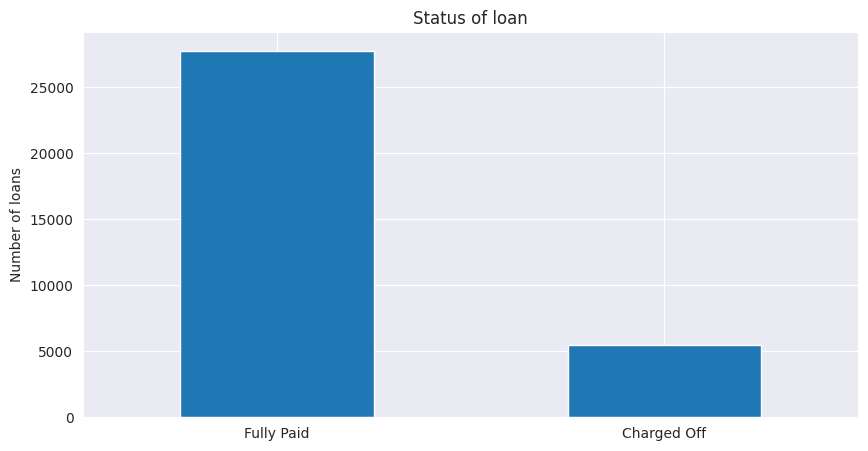

In [30]:
plt.figure(figsize=(10, 5))
data_df.loan_status.value_counts().plot.bar()
plt.title("Status of loan")
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Number of loans")
plt.show()

We observe that:
- More than **27K** loans have been fully paid
- **~5.5K** loans are actually bad loans i.e. the applicants defaulted

### Loan amount

In [31]:
data_df.loan_amnt.describe()

count    33232.000000
mean      9751.773893
std       6422.194941
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12800.000000
max      35000.000000
Name: loan_amnt, dtype: float64

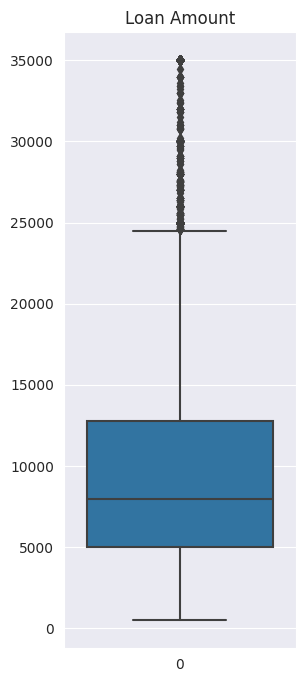

In [32]:
plt.figure(figsize=(3, 8))
sns.boxplot(data_df.loan_amnt)
plt.title('Loan Amount')
plt.show()

We observe that:
- The median amount that is applied for is USD 8200
- Only 25% of the applicants have applied for amounts greater than USD 13000

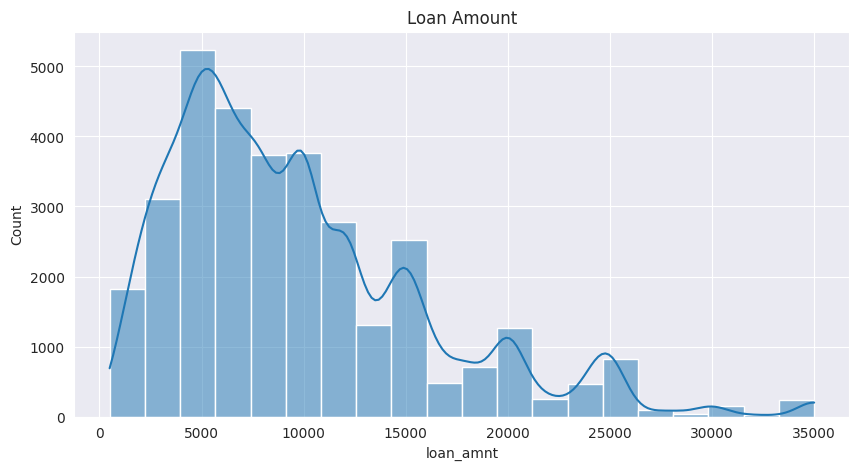

In [33]:
plt.figure(figsize=(10, 5))
sns.histplot(data_df.loan_amnt, bins=20, kde=True)
plt.title('Loan Amount')
plt.show()

### Funded Amount

In [34]:
data_df.funded_amnt.describe()

count    33232.000000
mean      9536.088710
std       6191.769515
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

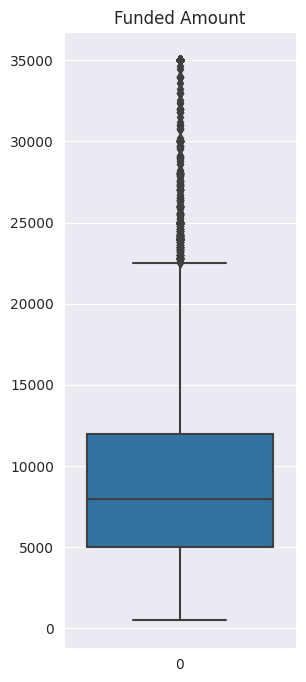

In [35]:
plt.figure(figsize=(3, 8))
sns.boxplot(data_df.funded_amnt)
plt.title('Funded Amount')
plt.show()

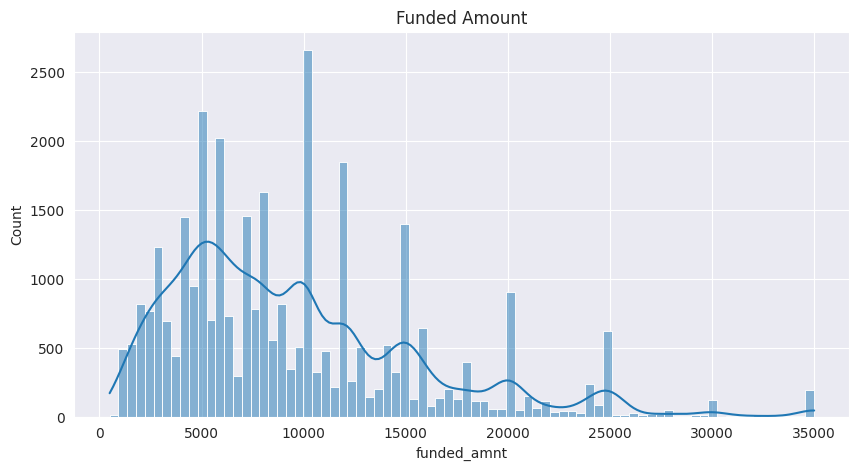

In [36]:
plt.figure(figsize=(10, 5))
sns.histplot(data_df.funded_amnt, kde=True)
plt.title('Funded Amount')
plt.show()

We observe that:
- The median amount that is funded by the club is approximately USD 8000

### Amount Funded by Investor

In [37]:
data_df.funded_amnt_inv.describe()

count    33232.000000
mean      9018.542587
std       6106.340451
min          0.000000
25%       4775.000000
50%       7775.000000
75%      12000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

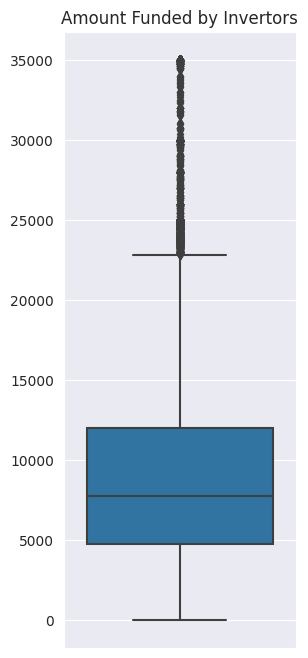

In [38]:
plt.figure(figsize=(3, 8))
sns.boxplot(data_df.funded_amnt_inv)
plt.title('Amount Funded by Invertors')
plt.xticks(ticks=[])
plt.show()

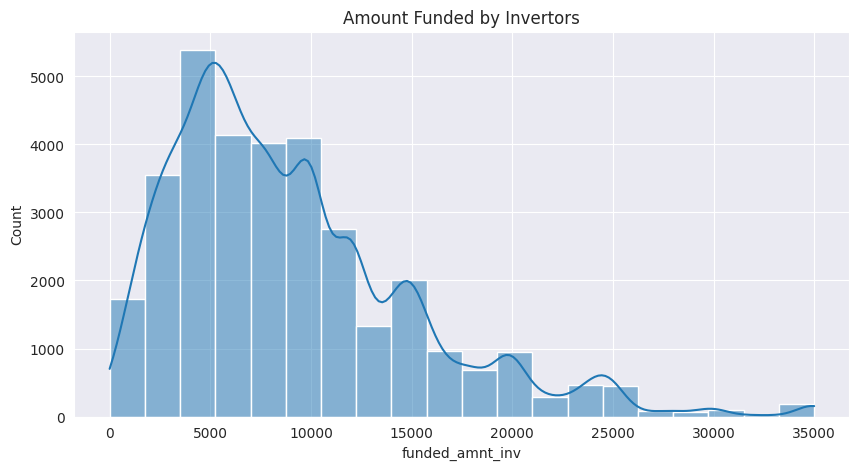

In [39]:
plt.figure(figsize=(10, 5))
sns.histplot(data_df.funded_amnt_inv, bins=20, kde=True)
plt.title('Amount Funded by Invertors')
plt.show()

We observe that:
- The median amount that is funded by the investors is a approximately USD 8000
- Only 25% of the loans have been funded for more than USD 12000

### Term of the loan

In [40]:
data_df.term.value_counts() / data_df.term.value_counts().sum()

term
36    0.791135
60    0.208865
Name: count, dtype: float64

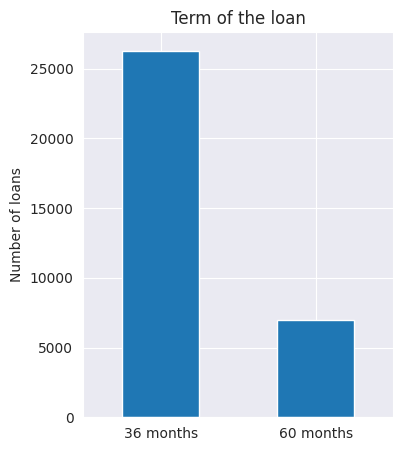

In [41]:
plt.figure(figsize=(4, 5))
data_df.term.value_counts().plot.bar()
plt.title("Term of the loan")
plt.xticks(ticks=[0 ,1], labels=['36 months', '60 months'], rotation=0)
plt.xlabel("")
plt.ylabel("Number of loans")
plt.show()

We have loans of 2 type of terms:
- 36 months or 3 years
- 60 months or 5 years

We observe that amount of loans issued for the 36 month period are far more than those issued for 60 month period.

### Interest Rates

In [42]:
data_df.int_rate.describe()

count    33232.000000
mean        11.700860
std          3.596542
min          5.420000
25%          8.880000
50%         11.490000
75%         14.170000
max         24.400000
Name: int_rate, dtype: float64

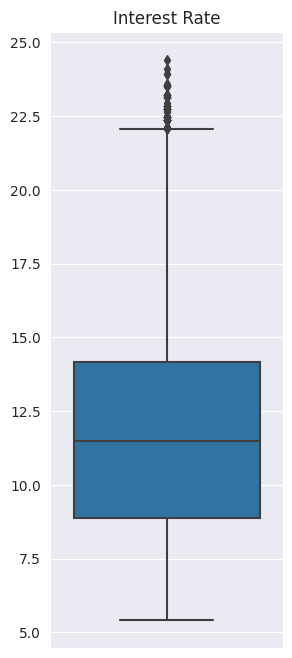

In [43]:
plt.figure(figsize=(3, 8))
sns.boxplot(data_df.int_rate)
plt.title('Interest Rate')
plt.xticks(ticks=[])
plt.show()

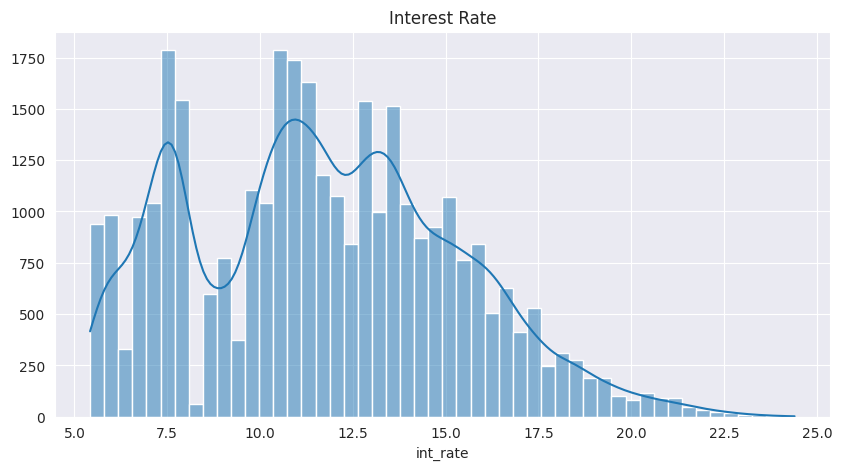

In [44]:
plt.figure(figsize=(10, 5))
sns.histplot(data_df.int_rate, bins=50, kde=True)
plt.title('Interest Rate')
plt.ylabel(None)
plt.show()

We observe that:
- **More than 75%** of the loans have an interest rate less than **15%**
- **50%** of the loans have an interest rate between ~**9%** and ~**14.25%** 

### Installments

In [45]:
data_df.installment.describe()

count    33232.000000
mean       289.513776
std        186.987542
min         15.690000
25%        155.560000
50%        248.080000
75%        375.402500
max       1305.190000
Name: installment, dtype: float64

We observe that:
- Median installment paid is **~USD 250**
- **More than 75%** of the monthly installments are **below USD 375**

### Grade and Sub-Grade

In [46]:
data_df.grade.value_counts().sort_index()

grade
A     9229
B    10057
C     6772
D     4308
E     1985
F      691
G      190
Name: count, dtype: int64

In [47]:
data_df.sub_grade.value_counts()

sub_grade
A4    2602
A5    2440
B3    2397
B5    2240
B4    2086
C1    1770
B2    1723
A3    1697
C2    1651
B1    1611
A2    1421
C3    1298
D2    1100
A1    1069
C4    1048
C5    1005
D3     941
D1     843
D4     755
D5     669
E1     563
E2     462
E3     390
E4     307
E5     263
F1     217
F2     165
F3     113
F4     109
F5      87
G1      60
G2      53
G3      31
G4      30
G5      16
Name: count, dtype: int64

We observe that:
- Most of the loans are **Grade B**, followed by **A**, and **C**
- Most of the loans are of sub-grade **A4** followed by **B3**, and **A5**

### Employee Title

> **NOTE**: The values of this columns are text. We observe that values indicating same employer name are repeated in different cases, and spellings. We tackled the case earlier by converting every value to upper case. 

In [48]:
data_df.emp_title.value_counts()[:10]

emp_title
US ARMY              176
BANK OF AMERICA      111
WALMART               73
AT&T                  65
UPS                   56
WELLS FARGO           55
USPS                  52
KAISER PERMANENTE     52
SELF EMPLOYED         52
VERIZON WIRELESS      51
Name: count, dtype: int64

We observed that:
- Most of the loans are issued to employees of **US Army**

### Employee Length

In [49]:
data_df.emp_length.value_counts()

emp_length
10+ years    6886
<1 year      4035
2 years      3800
3 years      3514
4 years      2910
1 year       2837
5 years      2754
6 years      1857
7 years      1469
8 years      1193
9 years      1027
Name: count, dtype: int64

We observe that:
- More than **~6900** applicants have **more than 10 years** of continuous employment

### Home Ownership

In [50]:
data_df.home_ownership.value_counts()

home_ownership
RENT        16716
MORTGAGE    13846
OWN          2580
OTHER          87
NONE            3
Name: count, dtype: int64

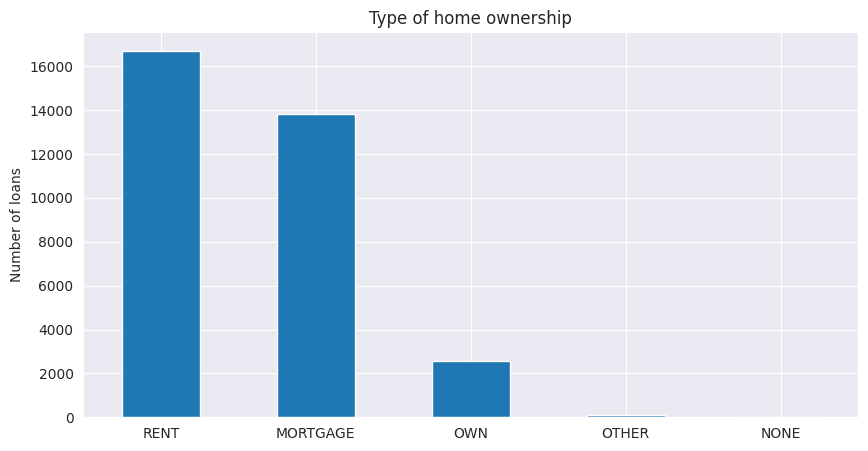

In [51]:
plt.figure(figsize=(10, 5))
data_df.home_ownership.value_counts().plot.bar()
plt.title("Type of home ownership")
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Number of loans")
plt.show()

We observe that:
- **~16800** applicants are renters, closely followed by applicates with mortgage

### Verification Status of Income

In [52]:
data_df.verification_status.value_counts()

verification_status
Not Verified       15532
Verified            9272
Source Verified     8428
Name: count, dtype: int64

We observe that:
- ~**15500** applicants' income is not verified
- Only ~**25%** of the applicants' source of income is verified

### Purpose of Loan

In [53]:
data_df.purpose.str.upper().value_counts()

purpose
DEBT_CONSOLIDATION    15183
CREDIT_CARD            4334
OTHER                  3520
HOME_IMPROVEMENT       2324
MAJOR_PURCHASE         1945
SMALL_BUSINESS         1497
CAR                    1409
WEDDING                 833
MEDICAL                 610
MOVING                  537
VACATION                360
EDUCATIONAL             304
HOUSE                   289
RENEWABLE_ENERGY         87
Name: count, dtype: int64

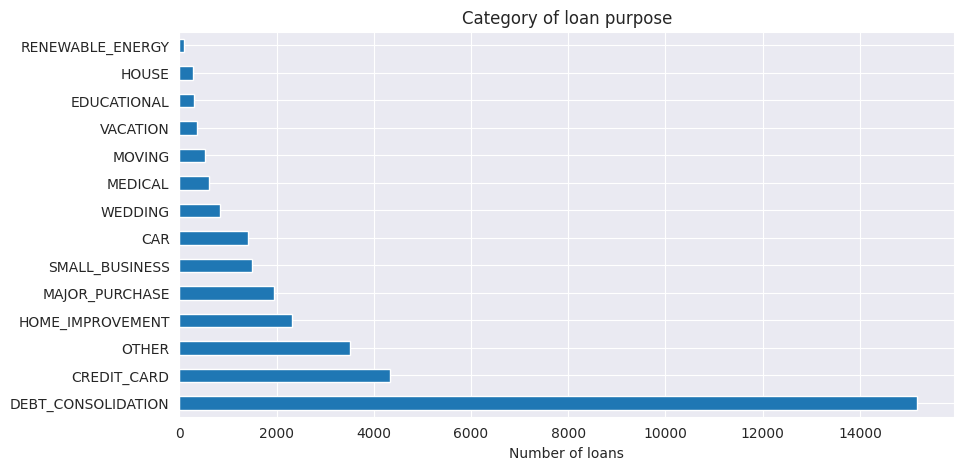

In [54]:
plt.figure(figsize=(10, 5))
data_df.purpose.str.upper().value_counts().plot.barh()
plt.title("Category of loan purpose")
plt.ylabel("")
plt.xlabel("Number of loans")
plt.show()

We observe that:
- Most popular reason for applying for a loan is **debt consilidation (~45%)**
- Least number of loan application are for **Renewable Energy**, **Education**, and **Housing** 

### Title

In [55]:
data_df.title.value_counts()[:10]

title
debt consolidation           2465
debt consolidation loan      1407
personal loan                 866
consolidation                 573
personal                      491
home improvement              433
credit card consolidation     414
credit card loan              298
small business loan           285
consolidation loan            276
Name: count, dtype: int64

We observe that:
- Most loans are applied for **Debt Consolidation**

### State of residence 

In [56]:
data_df.addr_state.value_counts()

addr_state
CA    6001
NY    3143
FL    2447
TX    2235
NJ    1518
PA    1284
IL    1280
GA    1171
VA    1157
MA    1108
OH    1049
MD     874
AZ     731
WA     723
CO     666
NC     633
MI     606
CT     602
MO     584
MN     540
NV     413
SC     401
OR     386
AL     386
WI     375
LA     365
KY     270
OK     251
KS     215
UT     207
AR     205
RI     172
DC     167
NM     165
WV     148
NH     145
HI     143
DE      98
WY      72
MT      68
AK      62
SD      55
VT      51
MS      19
TN      16
IN       7
IA       5
NE       5
ID       5
ME       3
Name: count, dtype: int64

We observe that:
- Most applicants are from the California, New York and Florida
- Idaho, Nebraska, and Maine are the states with least number of loan applications

### Debt-To-Income Ratio

In [57]:
data_df.dti.describe()

count    33232.000000
mean        13.358439
std          6.675129
min          0.000000
25%          8.210000
50%         13.470000
75%         18.650000
max         29.990000
Name: dti, dtype: float64

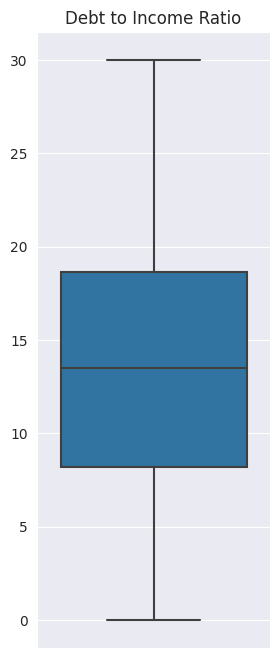

In [58]:
plt.figure(figsize=(3, 8))
sns.boxplot(data_df.dti)
plt.title('Debt to Income Ratio')
plt.xticks(ticks=[])
plt.show()

We observe that:
- The median ratio is 13.3, which is a quite good
- 25% of the applicants have DTI > 18.7

### Deliquincy in the past 2 years

In [59]:
data_df.delinq_2yrs.value_counts()

delinq_2yrs
0     29614
1      2779
2       567
3       183
4        53
5        18
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64

We observe that:
- Most of the applicants have not shown any delinquent behviour in the past 2 years
- Less than 100 applicant have a record of 4 or more delinquency incidence in past 2 year

### Inquiries made in the past 6 months

In [60]:
data_df.inq_last_6mths.value_counts()

inq_last_6mths
0    16257
1     9214
2     4789
3     2524
4      256
5      110
6       44
7       27
8       11
Name: count, dtype: int64

### Earliest Credit Line Year

The year the borrower's earliest reported credit line was opened

In [61]:
data_df.earliest_cr_line_year.value_counts()

earliest_cr_line_year
2000    2775
1999    2518
1998    2392
2001    2166
1997    2040
1996    1840
1995    1718
2002    1695
2003    1684
2004    1600
1994    1583
2005    1378
1993    1191
2006    1104
1992     845
1990     791
1991     759
1989     680
2007     676
1988     588
1987     479
1986     408
1985     358
1984     309
1983     252
1982     173
2008     147
1980     147
1981     137
1978     134
1979     122
1977      85
1976      74
1975      68
1974      53
1973      47
1970      43
1972      38
1971      36
1969      30
1967      16
1968      15
1963      10
1966       9
1964       5
1965       4
1962       3
1954       2
1961       2
1959       1
1956       1
1946       1
Name: count, dtype: int64

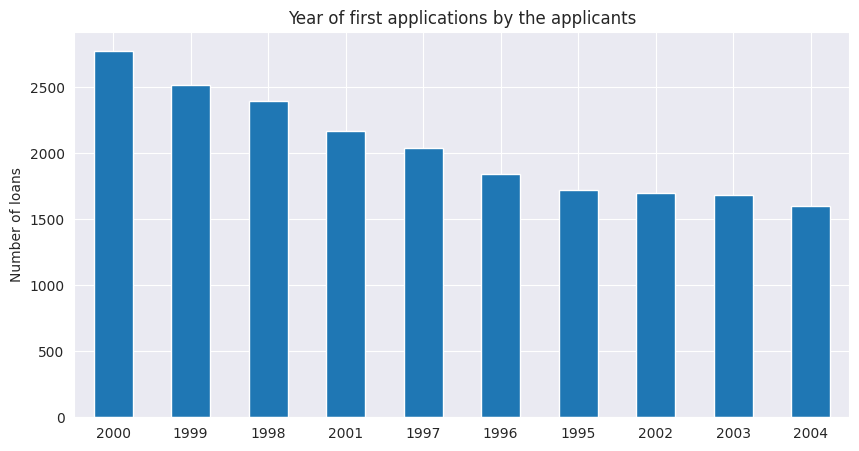

In [62]:
plt.figure(figsize=(10, 5))
data_df.earliest_cr_line_year.value_counts()[:10].plot.bar()
plt.title('Year of first applications by the applicants')
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Number of loans")
plt.show()

We observe that:
- Although the earliest line of credit for the applicants can be traced back to 1946, most of the applicant have thier first line of credit in the 1990s and 2000s

### Earliest Credit Line Month 

The month the borrower's earliest reported credit line was opened


In [63]:
data_df.earliest_cr_line_month.value_counts()

earliest_cr_line_month
Oct    3442
Dec    3395
Nov    3310
Sep    3048
Jan    2870
Aug    2786
Jul    2555
Jun    2440
May    2416
Feb    2382
Mar    2338
Apr    2250
Name: count, dtype: int64

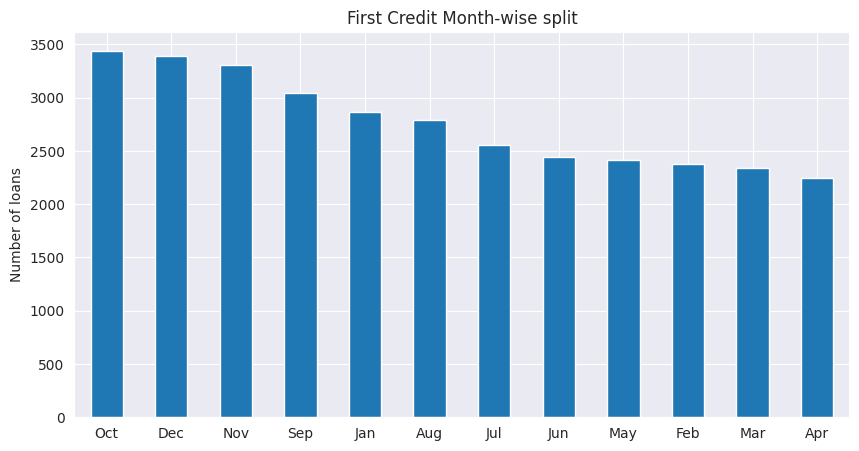

In [64]:
plt.figure(figsize=(10, 5))
data_df.earliest_cr_line_month.value_counts().plot.bar()
plt.title('First Credit Month-wise split')
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Number of loans")
plt.show()

We observe that:
- Most applicants took their first loans in the month of October, followed by December and November

### Issued Year and month 

The month and the year in which loan was funded

In [65]:
data_df.issue_d_year.value_counts()

issue_d_year
2011    17054
2010    10236
2009     4263
2008     1457
2007      222
Name: count, dtype: int64

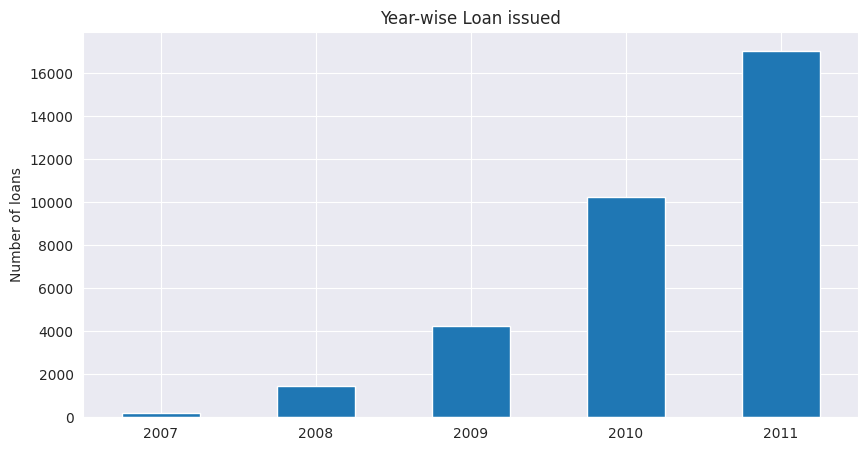

In [66]:
plt.figure(figsize=(10, 5))
data_df.issue_d_year.value_counts().sort_index().plot.bar()
plt.title('Year-wise Loan issued')
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Number of loans")
plt.show()

We observe that:
- Most loans are issue in 2011
- There is a steady increase in the number of loans issues YoY

In [67]:
data_df.issue_d_month.value_counts()

issue_d_month
Dec    3573
Nov    3417
Oct    3166
Sep    2950
Jul    2916
Aug    2878
Jun    2746
May    2562
Apr    2482
Mar    2361
Feb    2093
Jan    2088
Name: count, dtype: int64

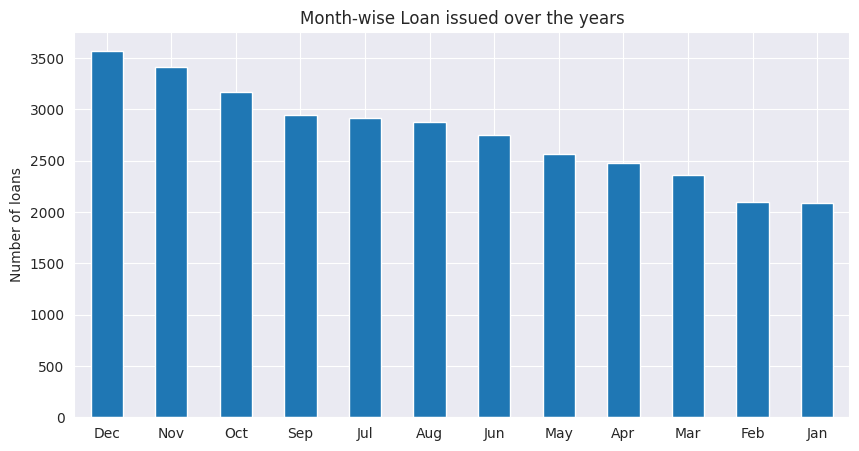

In [68]:
plt.figure(figsize=(10, 5))
data_df.issue_d_month.value_counts().plot.bar()
plt.title('Month-wise Loan issued over the years')
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Number of loans")
plt.show()

We observe that:
- Top-2 months are December and November with more than 4000 application every month
- January and February have the lowest number of applications

### Public Record Bankruptcies

Number of public record bankruptcies

In [69]:
data_df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    31113
1.0     1477
2.0        5
Name: count, dtype: int64

We observe that:
- There are 1513 borrowers who have declared bankruptcy among which only 6 have declared bankrupcies twice

### Last Credit Pulled date

The most recent month LC pulled the credit for this loan

In [70]:
data_df.last_credit_pull_d_year.value_counts()

last_credit_pull_d_year
2016    12405
2014     5524
2015     4781
2013     4474
2012     3394
2011     1768
2010      662
2009      177
2008       26
2007       19
Name: count, dtype: int64

In [71]:
data_df.last_credit_pull_d_month.value_counts()

last_credit_pull_d_month
May    9791
Apr    3652
Mar    2810
Feb    2606
Dec    2096
Nov    1940
Sep    1805
Oct    1775
Jan    1766
Aug    1752
Jul    1729
Jun    1508
Name: count, dtype: int64

### Last Payment Year and Month

In [72]:
data_df.last_pymnt_d_year.value_counts()

last_pymnt_d_year
2014    8413
2013    8255
2012    7405
2011    4021
2015    2181
2010    1474
2016     855
2009     452
2008     105
Name: count, dtype: int64

In [73]:
data_df.last_pymnt_d_month.value_counts()

last_pymnt_d_month
Mar    3207
Dec    3074
Oct    2837
Aug    2799
Jul    2780
Feb    2751
May    2749
Apr    2658
Jan    2629
Sep    2583
Nov    2573
Jun    2521
Name: count, dtype: int64

### Collection Recovery Fee

In [74]:
data_df.collection_recovery_fee.describe()

count    33232.000000
mean        13.733447
std        154.926539
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64

> **NOTE**: Since the collection recovery fee is only applicable in case of bad loan, we are choosing not to remove outliers from this column.  

We observe that:
- Collection recovery fee is 0 for most of the application

### Recoveries

In [75]:
data_df.recoveries.describe()

count    33232.000000
mean       107.615220
std        731.187385
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29623.350000
Name: recoveries, dtype: float64

> **NOTE**: Since the recoveries is only applicable in case of bad loan, we are choosing not to remove outliers from this column.  

We observe that:
- Recoveries is 0 for most of the application

### Total Recovered Late Fee

In [76]:
data_df.total_rec_late_fee.describe()

count    33232.000000
mean         1.443997
std          7.473277
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64

Here also we can that the column doesn't have any significant data

### Total Recovery Interest

In [77]:
data_df.total_rec_int.describe()

count    33232.000000
mean      1879.909254
std       2056.450259
min          0.000000
25%        611.017500
50%       1200.135000
75%       2357.072500
max      23563.680000
Name: total_rec_int, dtype: float64

### Total Recovery Principle 

In [78]:
data_df.total_rec_prncp.describe()

count    33232.000000
mean      8281.319242
std       5857.831213
min          0.000000
25%       4000.000000
50%       7000.000000
75%      11222.957500
max      35000.000000
Name: total_rec_prncp, dtype: float64

### Total Payment Funded by Investors

Total payment received for the amount invested by the investors

In [79]:
data_df.total_pymnt_inv.describe()

count    33232.000000
mean      9735.880860
std       7326.188882
min          0.000000
25%       4510.477500
50%       7908.745000
75%      13146.637500
max      58563.680000
Name: total_pymnt_inv, dtype: float64

### Total Payment 

In [80]:
data_df.total_pymnt.describe()

count    33232.000000
mean     10270.287629
std       7430.283617
min          0.000000
25%       5001.638690
50%       8436.838817
75%      13695.970025
max      58563.679930
Name: total_pymnt, dtype: float64

From this we can understand that the median amount of the total payment received is 9899 USD

### Out Principal and Out Principal Invested by Investors

Remaining outstanding principal for total amount funded and Remaining outstanding principal for total amount funded by investors

In [81]:
data_df.out_prncp_inv.describe()

count    33232.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp_inv, dtype: float64

In [82]:
data_df.out_prncp.describe()

count    33232.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp, dtype: float64

Since these two do not have any value other than $0$, we are choosing to drop them.

In [83]:
data_df = data_df.drop(['out_prncp', 'out_prncp_inv'], axis=1)

### Total Accounts

The total number of credit lines currently in the borrower's credit file


In [84]:
data_df.total_acc.describe()

count    33232.000000
mean        21.204983
std         11.124622
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64

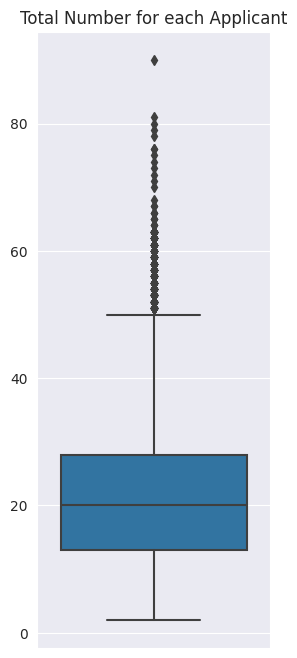

In [85]:
plt.figure(figsize=(3, 8))
sns.boxplot(data_df.total_acc)
plt.title('Total Number for each Applicant')
plt.xticks(ticks=[])
plt.show()

### Revolving Credit Utilization 

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [86]:
data_df.revol_util.describe()

count    33183.000000
mean        48.661622
std         28.371270
min          0.000000
25%         25.100000
50%         49.000000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

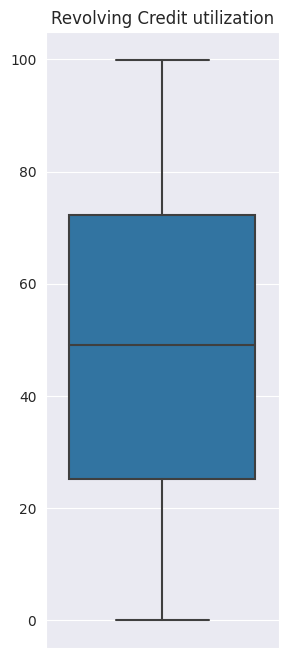

In [87]:
plt.figure(figsize=(3, 8))
sns.boxplot(data_df.revol_util)
plt.title('Revolving Credit utilization')
plt.xticks(ticks=[])
plt.show()

### Revolving balance

In [88]:
data_df.revol_bal.describe()

count     33232.000000
mean      11941.561958
std       13716.997300
min           0.000000
25%        3382.000000
50%        8081.000000
75%       15489.000000
max      149000.000000
Name: revol_bal, dtype: float64

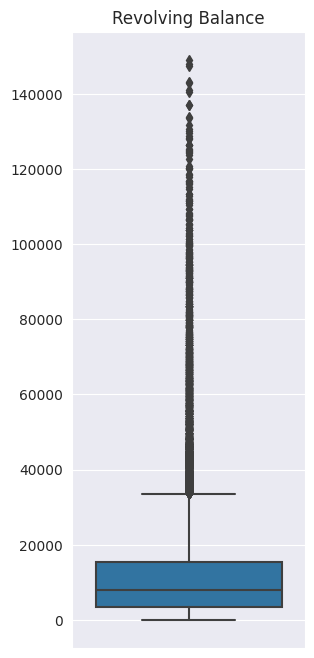

In [89]:
plt.figure(figsize=(3, 8))
sns.boxplot(data_df.revol_bal)
plt.title('Revolving Balance')
plt.xticks(ticks=[])
plt.show()

We observe that:
- The median of the total revolving balance is **~USD 8000**

### Public Records

The number of derogatory public records

In [90]:
data_df.pub_rec.value_counts()

pub_rec
0    31356
1     1823
2       45
3        6
4        2
Name: count, dtype: int64

These number show that majoriity of the borrowers don't have derogaotry public records

### Open Credit lines

The number of open credit lines in the borrower's credit file.

In [91]:
data_df.open_acc.value_counts()

open_acc
6     3427
7     3415
8     3306
9     3105
5     2816
10    2612
11    2232
4     2099
12    1821
13    1533
3     1373
14    1174
15     936
16     717
2      568
17     565
18     417
19     300
20     223
21     196
22     114
23      70
24      61
25      47
26      26
28      21
27      17
29       9
30       8
31       6
34       4
35       3
32       2
33       2
36       2
39       1
38       1
44       1
41       1
42       1
Name: count, dtype: int64

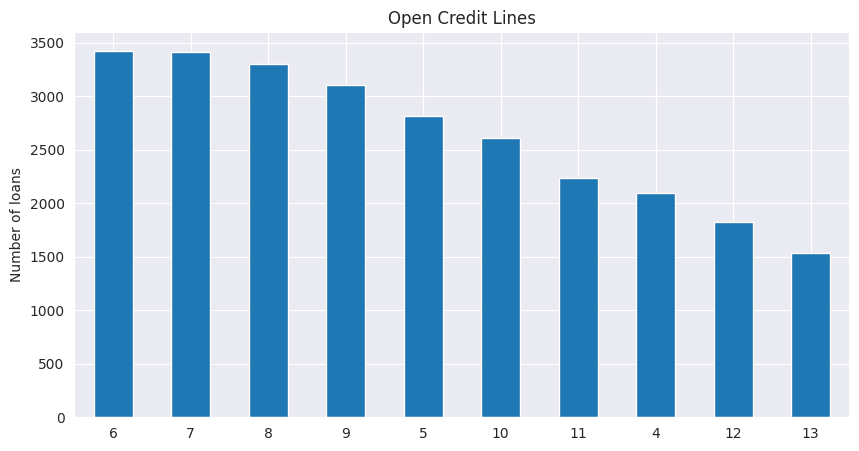

In [92]:
plt.figure(figsize=(10, 5))
data_df.open_acc.value_counts()[:10].plot.bar()
plt.title('Open Credit Lines')
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Number of loans")
plt.show()

We observe that:
- **~7000** applicants have 6 or 7 lines of credit
- **~600** applicants have more than 20 credit lines

## Step 3: Segmented Uni-Variate Analysis

### Segmenting based on Loan Status

#### Loan Amount, Funded Amount, Investor Amounts

**Mean**

In [93]:
temp_df = data_df.groupby(['loan_status']).agg({'loan_amnt': 'mean', 'funded_amnt':'mean', 'funded_amnt_inv':'mean'}).reset_index()
temp_df.columns = ['loan_status', 'loan_amount', 'funded_amount', 'funded_amount_inv']
temp_df

loan_status   loan_amount  funded_amount  funded_amount_inv
0  Charged Off  11846.081577   11520.242896       10653.391105
1   Fully Paid   9340.482234    9146.429600        8697.482045

In [94]:
temp_df = temp_df.melt(id_vars='loan_status', var_name='agg_fn', value_name='agg_value')
temp_df

loan_status             agg_fn     agg_value
0  Charged Off        loan_amount  11846.081577
1   Fully Paid        loan_amount   9340.482234
2  Charged Off      funded_amount  11520.242896
3   Fully Paid      funded_amount   9146.429600
4  Charged Off  funded_amount_inv  10653.391105
5   Fully Paid  funded_amount_inv   8697.482045

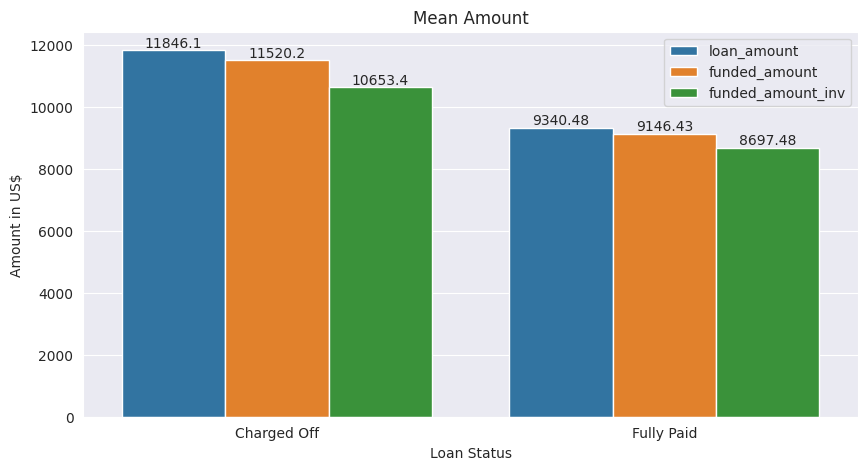

In [95]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=temp_df, x='loan_status', y='agg_value', hue='agg_fn')
ax.bar_label(ax.containers[0])# fmt="{:0f}")
ax.bar_label(ax.containers[1])# fmt="{:0.1f}")
ax.bar_label(ax.containers[2])# fmt="{:0.1f}")
plt.title("Mean Amount")
plt.xlabel("Loan Status")
plt.ylabel("Amount in US$")
plt.legend()
plt.show()

**Median**

In [96]:
temp_df = data_df.groupby(['loan_status']).agg({'loan_amnt': 'median',
                                                'funded_amnt':'median',
                                                'funded_amnt_inv':'median'}).reset_index()
temp_df.columns = ['loan_status', 'loan_amount', 'funded_amount', 'funded_amount_inv']
temp_df

loan_status  loan_amount  funded_amount  funded_amount_inv
0  Charged Off      10000.0        10000.0             9000.0
1   Fully Paid       8000.0         8000.0             7500.0

In [97]:
temp_df = temp_df.melt(id_vars='loan_status', var_name='agg_fn', value_name='agg_value')
temp_df

loan_status             agg_fn  agg_value
0  Charged Off        loan_amount    10000.0
1   Fully Paid        loan_amount     8000.0
2  Charged Off      funded_amount    10000.0
3   Fully Paid      funded_amount     8000.0
4  Charged Off  funded_amount_inv     9000.0
5   Fully Paid  funded_amount_inv     7500.0

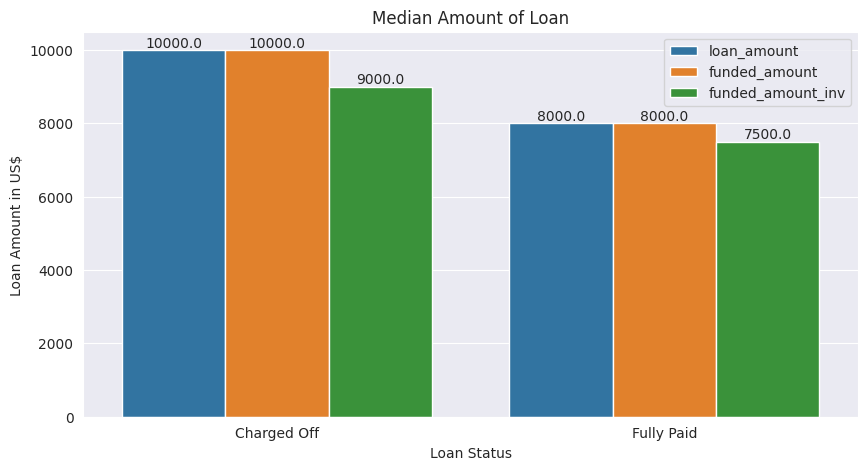

In [98]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=temp_df, x='loan_status', y='agg_value', hue='agg_fn')
ax.bar_label(ax.containers[0], fmt="{:0.1f}")
ax.bar_label(ax.containers[1], fmt="{:0.1f}")
ax.bar_label(ax.containers[2], fmt="{:0.1f}")
plt.title("Median Amount of Loan")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount in US$")
plt.legend()
plt.show()
del temp_df

#### Interest Rate

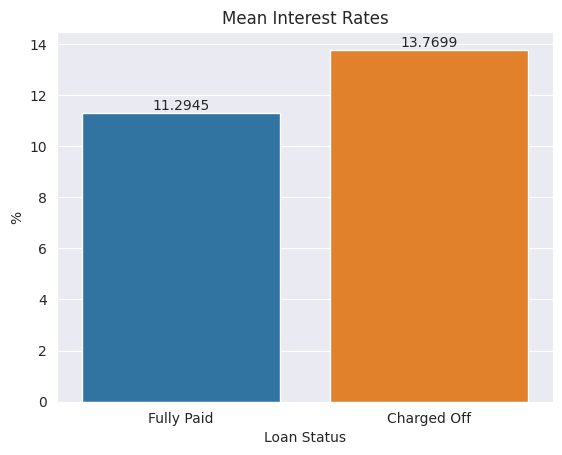

In [99]:
plt.figure()
ax = sns.barplot(data=data_df, x='loan_status', y='int_rate', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Mean Interest Rates")
plt.xlabel("Loan Status")
plt.ylabel("%")
plt.show()

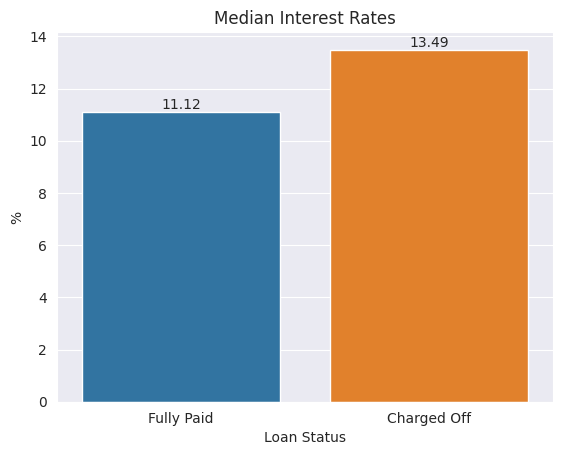

In [100]:
plt.figure()
ax = sns.barplot(data=data_df, x='loan_status', y='int_rate', estimator='median', errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Median Interest Rates")
plt.xlabel("Loan Status")
plt.ylabel("%")
plt.show()

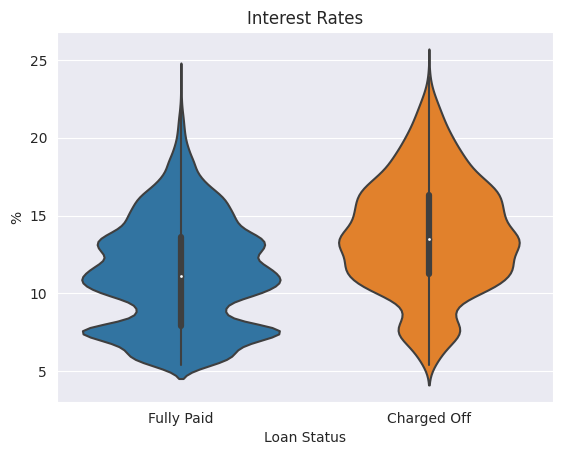

In [101]:
plt.figure()
sns.violinplot(data=data_df, x='loan_status', y='int_rate')
plt.title("Interest Rates")
plt.xlabel("Loan Status")
plt.ylabel("%")
plt.show()

#### Installment

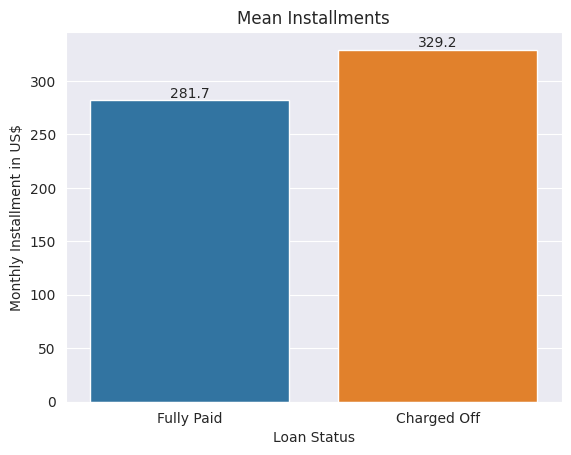

In [102]:
plt.figure()
ax = sns.barplot(data=data_df, x='loan_status', y='installment', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0], fmt="{:0.1f}")
plt.title("Mean Installments")
plt.xlabel("Loan Status")
plt.ylabel("Monthly Installment in US$")
plt.show()

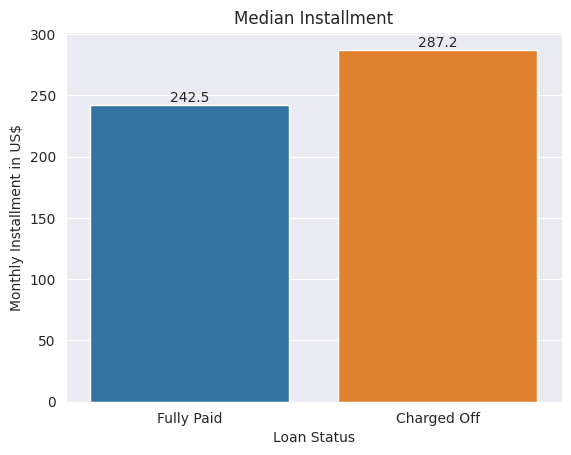

In [103]:
plt.figure()
ax = sns.barplot(data=data_df, x='loan_status', y='installment', estimator='median', errorbar=None)
ax.bar_label(ax.containers[0], fmt="{:0.1f}")
plt.title("Median Installment")
plt.xlabel("Loan Status")
plt.ylabel("Monthly Installment in US$")
plt.show()

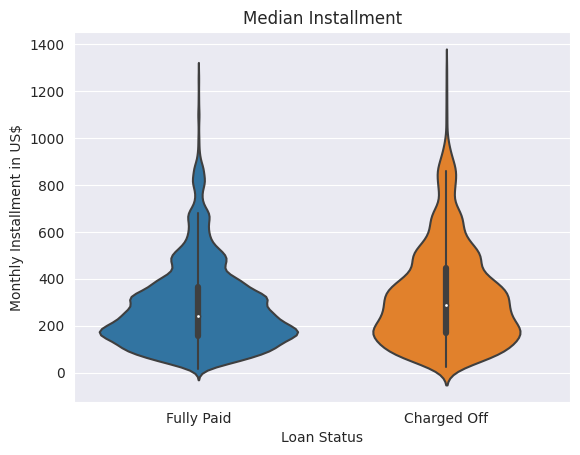

In [104]:
plt.figure()
ax = sns.violinplot(data=data_df, x='loan_status', y='installment')
plt.title("Median Installment")
plt.xlabel("Loan Status")
plt.ylabel("Monthly Installment in US$")
plt.show()

#### Grade

In [105]:
a = data_df.groupby(['loan_status', 'grade'])['id'].count().reset_index()
aa = a.groupby(['grade'])['id'].sum().reset_index()
a = a.merge(aa, how='inner', on='grade').drop_duplicates()
del aa
a.columns = ['loan_status', 'grade', 'num_appln', 'total_grade']
a['percent_grade'] = a.num_appln * 100 / a.total_grade
a

loan_status grade  num_appln  total_grade  percent_grade
0   Charged Off     A        597         9229       6.468740
1    Fully Paid     A       8632         9229      93.531260
2   Charged Off     B       1382        10057      13.741672
3    Fully Paid     B       8675        10057      86.258328
4   Charged Off     C       1328         6772      19.610159
5    Fully Paid     C       5444         6772      80.389841
6   Charged Off     D       1087         4308      25.232126
7    Fully Paid     D       3221         4308      74.767874
8   Charged Off     E        669         1985      33.702771
9    Fully Paid     E       1316         1985      66.297229
10  Charged Off     F        297          691      42.981187
11   Fully Paid     F        394          691      57.018813
12  Charged Off     G         95          190      50.000000
13   Fully Paid     G         95          190      50.000000

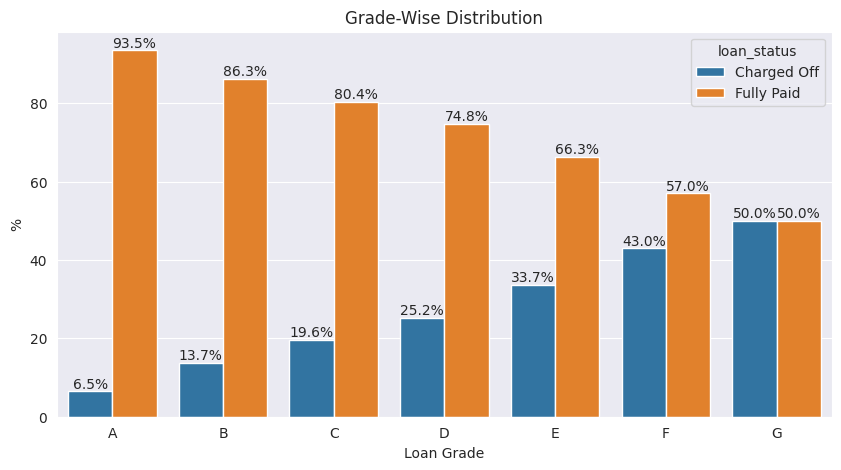

In [106]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=a, x='grade', y='percent_grade', hue='loan_status')
ax.bar_label(ax.containers[0], fmt="{:0.1f}%")
ax.bar_label(ax.containers[1], fmt="{:0.1f}%")
plt.title('Grade-Wise Distribution')
plt.xlabel("Loan Grade")
plt.ylabel("%")
plt.show()

#### Debt-to-Income

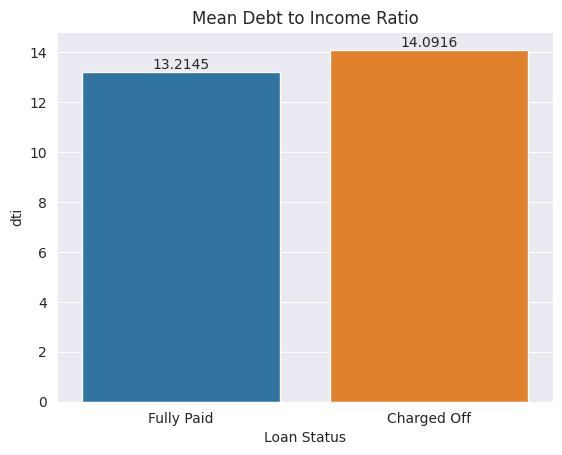

In [107]:
plt.figure()
ax = sns.barplot(data=data_df, x='loan_status', y='dti', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Mean Debt to Income Ratio")
plt.xlabel("Loan Status")
# plt.ylabel("%")
plt.show()

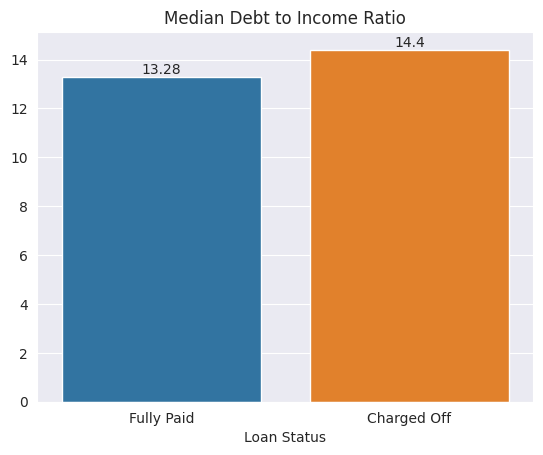

In [108]:
plt.figure()
ax = sns.barplot(data=data_df, x='loan_status', y='dti', estimator='median', errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Median Debt to Income Ratio")
plt.xlabel("Loan Status")
plt.ylabel("")
plt.show()

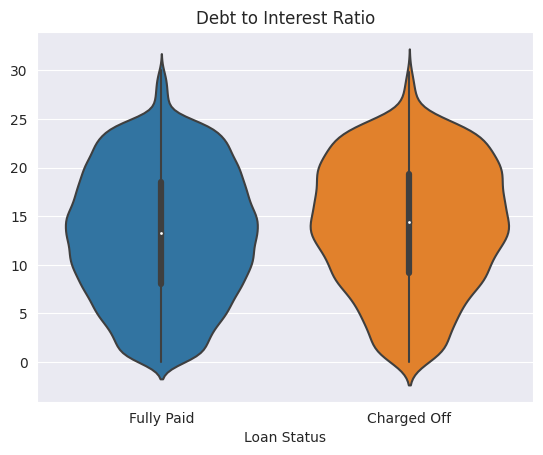

In [109]:
plt.figure()
sns.violinplot(data=data_df, x='loan_status', y='dti')
# ax.bar_label(ax.containers[0])
plt.title("Debt to Interest Ratio")
plt.xlabel("Loan Status")
plt.ylabel("")
plt.show()

#### Address State

In [110]:
a = data_df.groupby(['loan_status', 'addr_state'])['id'].count().reset_index()
aa = a.groupby(['addr_state'])['id'].sum().reset_index()
a = a.merge(aa, how='inner', on='addr_state').drop_duplicates()
del aa
a.columns = ['loan_status', 'addr_state', 'num_appln', 'total_state']
a['percent_state'] = a.num_appln * 100 / a.total_state
a = a.sort_values(by=['total_state', 'loan_status'], ascending=[False, True])
a

loan_status addr_state  num_appln  total_state  percent_state
8   Charged Off         CA       1084         6001      18.063656
9    Fully Paid         CA       4917         6001      81.936344
60  Charged Off         NY        476         3143      15.144766
61   Fully Paid         NY       2667         3143      84.855234
18  Charged Off         FL        488         2447      19.942787
19   Fully Paid         FL       1959         2447      80.057213
78  Charged Off         TX        295         2235      13.199105
79   Fully Paid         TX       1940         2235      86.800895
54  Charged Off         NJ        271         1518      17.852437
55   Fully Paid         NJ       1247         1518      82.147563
68  Charged Off         PA        178         1284      13.862928
69   Fully Paid         PA       1106         1284      86.137072
26  Charged Off         IL        193         1280      15.078125
27   Fully Paid         IL       1087         1280      84.921875
20  Charged Off         GA        211         1171      18.018787
21   Fully Paid         GA        960         1171      81.981213
82  Charged Off         VA        173         1157      14.952463
83   Fully Paid         VA        984         1157      85.047537
34  Charged Off         MA        150         1108      13.537906
35   Fully Paid         MA        958         1108      86.462094
62  Charged Off         OH        151         1049      14.394662
63   Fully Paid         OH        898         1049      85.605338
36  Charged Off         MD        157          874      17.963387
37   Fully Paid         MD        717          874      82.036613
6   Charged Off         AZ        120          731      16.415869
7    Fully Paid         AZ        611          731      83.584131
86  Charged Off         WA        125          723      17.289073
87   Fully Paid         WA        598          723      82.710927
10  Charged Off         CO         96          666      14.414414
11   Fully Paid         CO        570          666      85.585586
48  Charged Off         NC        113          633      17.851501
49   Fully Paid         NC        520          633      82.148499
38  Charged Off         MI        100          606      16.501650
39   Fully Paid         MI        506          606      83.498350
12  Charged Off         CT         92          602      15.282392
13   Fully Paid         CT        510          602      84.717608
42  Charged Off         MO        111          584      19.006849
43   Fully Paid         MO        473          584      80.993151
40  Charged Off         MN         80          540      14.814815
41   Fully Paid         MN        460          540      85.185185
58  Charged Off         NV        104          413      25.181598
59   Fully Paid         NV        309          413      74.818402
72  Charged Off         SC         64          401      15.960100
73   Fully Paid         SC        337          401      84.039900
2   Charged Off         AL         53          386      13.730570
66  Charged Off         OR         70          386      18.134715
3    Fully Paid         AL        333          386      86.269430
67   Fully Paid         OR        316          386      81.865285
88  Charged Off         WI         61          375      16.266667
89   Fully Paid         WI        314          375      83.733333
32  Charged Off         LA         51          365      13.972603
33   Fully Paid         LA        314          365      86.027397
30  Charged Off         KY         45          270      16.666667
31   Fully Paid         KY        225          270      83.333333
64  Charged Off         OK         40          251      15.936255
65   Fully Paid         OK        211          251      84.063745
28  Charged Off         KS         30          215      13.953488
29   Fully Paid         KS        185          215      86.046512
80  Charged Off         UT         38          207      18.357488
81   Fully Paid         UT        169       

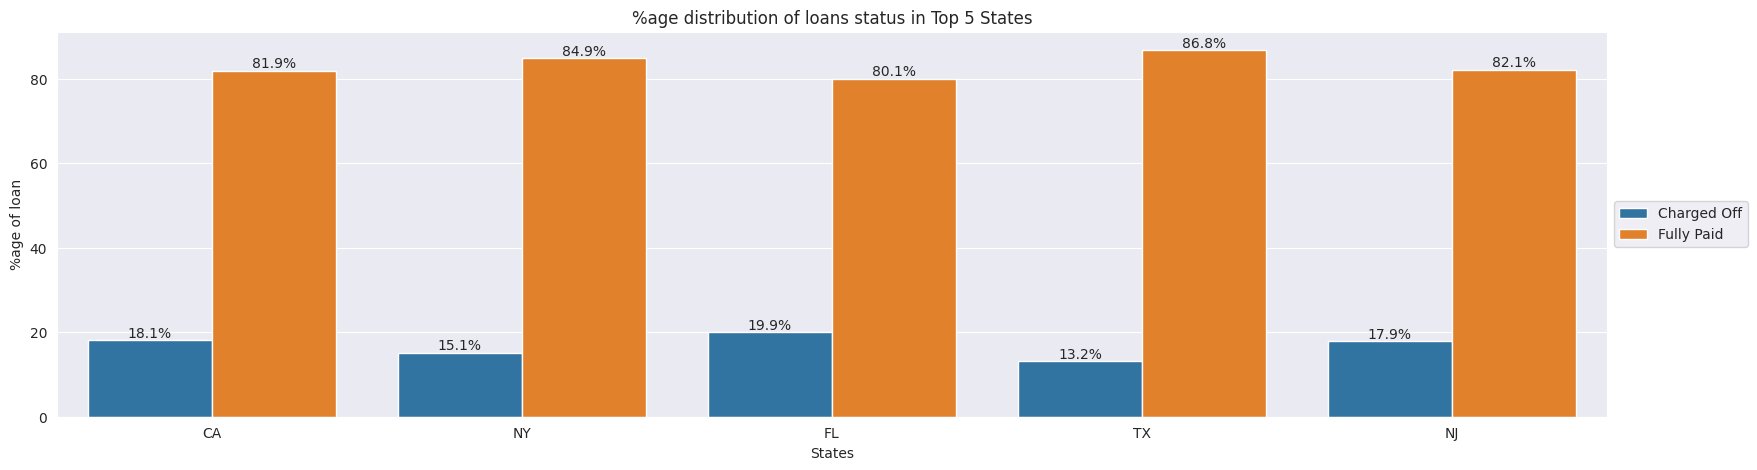

In [111]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(data=a.iloc[:10], x='addr_state', y='percent_state', hue='loan_status')
ax.bar_label(ax.containers[0], fmt="{:0.1f}%")
ax.bar_label(ax.containers[1], fmt="{:0.1f}%")
plt.title('%age distribution of loans status in Top 5 States')
plt.xlabel('States')
plt.ylabel('%age of loan')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
del a

#### Open Accounts

<Axes: xlabel='open_acc', ylabel='loan_status'>

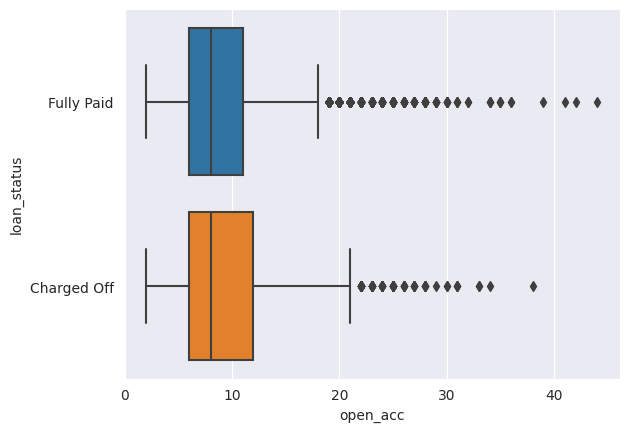

In [112]:
sns.boxplot(data=data_df, y='loan_status', x='open_acc')

#### Revolving Balance

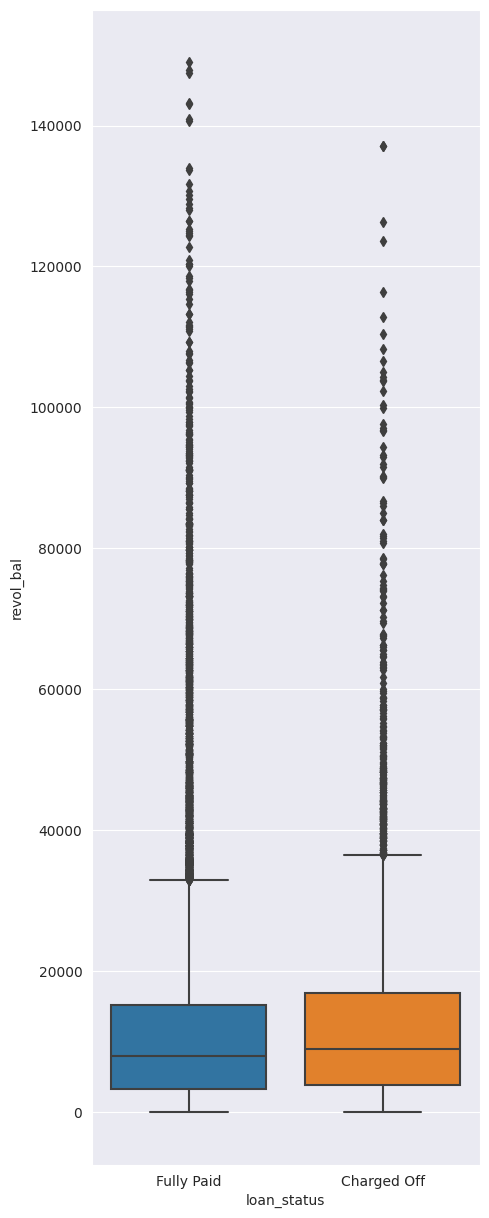

In [113]:
plt.figure(figsize=(5, 15))
sns.boxplot(data=data_df, x='loan_status', y='revol_bal')
plt.show()

#### Reloving Utilization

<Axes: xlabel='loan_status', ylabel='revol_util'>

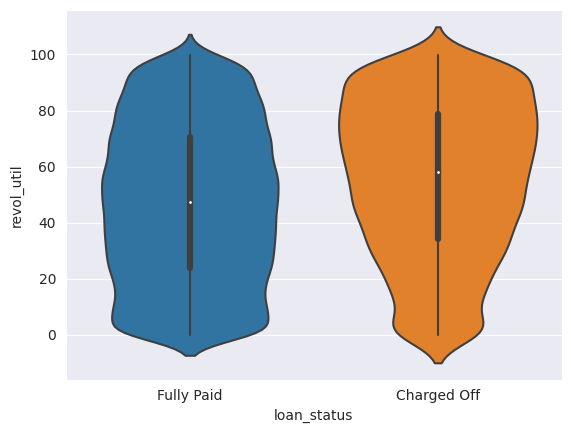

In [114]:
sns.violinplot(data=data_df, x='loan_status', y='revol_util')

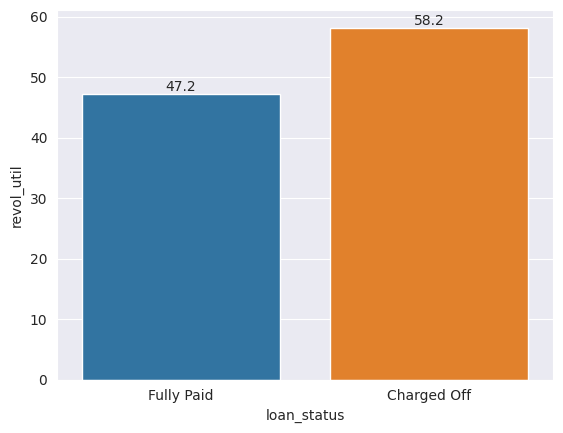

In [115]:
ax = sns.barplot(data=data_df, x='loan_status', y='revol_util', estimator='median', errorbar=None)
ax.bar_label(ax.containers[0])
plt.show()

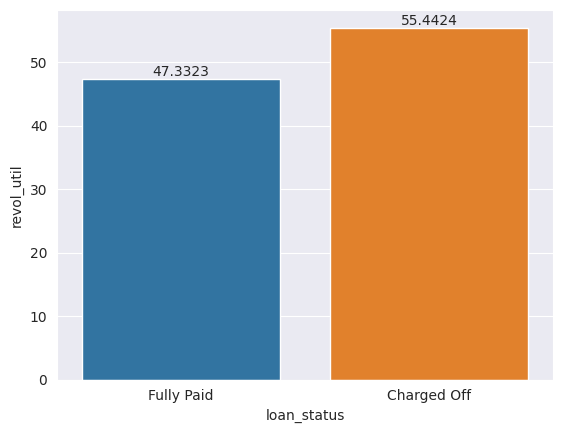

In [116]:
ax = sns.barplot(data=data_df, x='loan_status', y='revol_util', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0])
plt.show()

#### Purpose

In [117]:
a = data_df.groupby(['loan_status', 'purpose'])['id'].count().reset_index()
aa = a.groupby(['purpose'])['id'].sum().reset_index()
a = a.merge(aa, how='inner', on='purpose').drop_duplicates()
del aa
a.columns = ['loan_status', 'purpose', 'num_appln', 'total_per_purpose']
a['percent_purpose'] = a.num_appln * 100 / a.total_per_purpose
a = a.sort_values(by=['total_per_purpose', 'loan_status'], ascending=[False, True])
a = a[['loan_status', 'purpose', 'percent_purpose']]

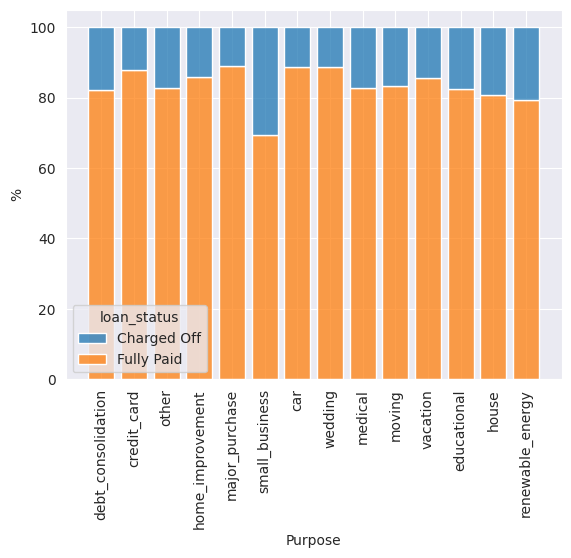

In [118]:
plt.figure()
sns.histplot(data=a, x='purpose', weights='percent_purpose', hue='loan_status', multiple='stack', shrink=0.8)
plt.xlabel("Purpose")
plt.ylabel('%')
plt.xticks(rotation=90)
plt.title("")
plt.show()

#### Terms

In [119]:
a = data_df.groupby(['loan_status', 'term'])['id'].count().reset_index()
aa = a.groupby(['term'])['id'].sum().reset_index()
a = a.merge(aa, how='inner', on='term').drop_duplicates()
del aa
a.columns = ['loan_status', 'term', 'num_appln', 'total_per_term']
a['percent_term'] = a.num_appln * 100 / a.total_per_term
a = a.sort_values(by=['total_per_term', 'loan_status'], ascending=[False, True])
a = a[['loan_status', 'term', 'percent_term']]

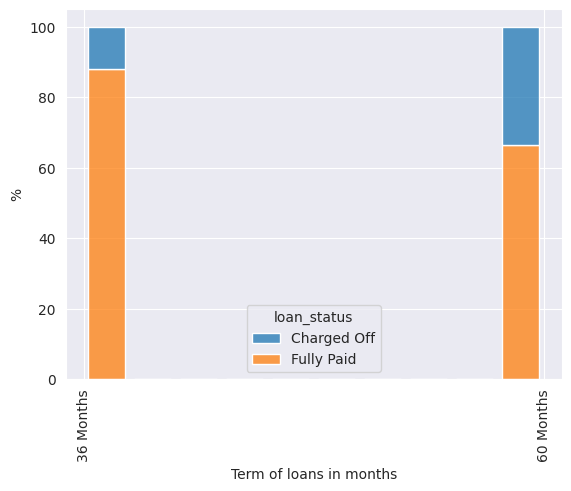

In [120]:
plt.figure()
sns.histplot(data=a, x='term', weights='percent_term', hue='loan_status', multiple='stack', shrink=0.8)
plt.xlabel("Term of loans in months")
plt.ylabel('%')
plt.xticks(ticks=[36, 60], labels=['36 Months', '60 Months'], rotation=90)
plt.title("")
plt.show()

#### Home Ownership

In [121]:
a = data_df.groupby(['loan_status', 'home_ownership'])['id'].count().reset_index()
aa = a.groupby(['home_ownership'])['id'].sum().reset_index()
a = a.merge(aa, how='inner', on='home_ownership').drop_duplicates()
del aa
a.columns = ['loan_status', 'home_ownership', 'num_appln', 'total_per_term']
a['percent_term'] = a.num_appln * 100 / a.total_per_term
a = a.sort_values(by=['total_per_term', 'loan_status'], ascending=[False, True])
a = a[['loan_status', 'home_ownership', 'percent_term']]

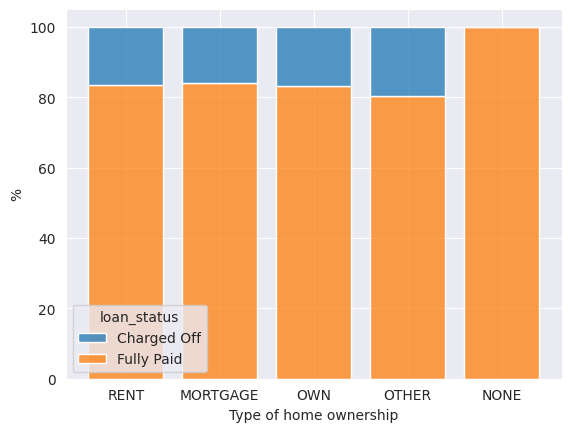

In [122]:
plt.figure()
sns.histplot(data=a, x='home_ownership', weights='percent_term', hue='loan_status', multiple='stack', shrink=0.8)
plt.xlabel("Type of home ownership")
plt.ylabel('%')
# plt.xticks(ticks=[36, 60], labels=['36 Months', '60 Months'], rotation=90)
plt.title("")
plt.show()

#### Annual Income

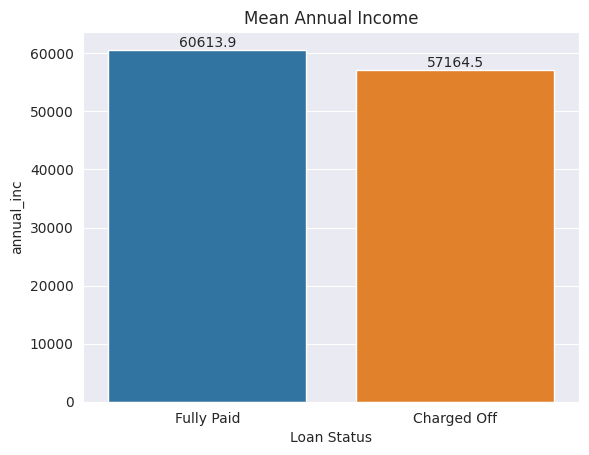

In [123]:
plt.figure()
ax = sns.barplot(data=data_df, x='loan_status', y='annual_inc', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Mean Annual Income")
plt.xlabel("Loan Status")
# plt.ylabel("%")
plt.show()

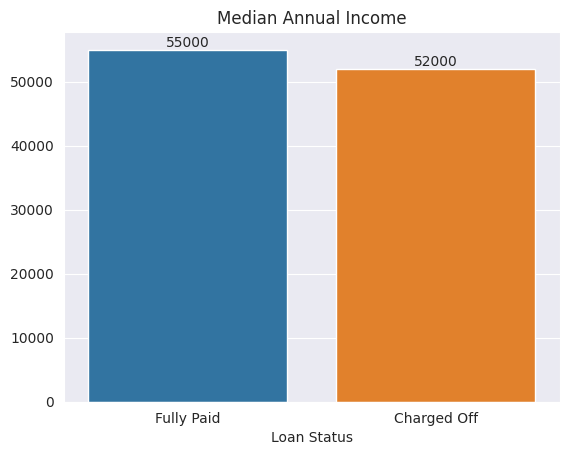

In [124]:
plt.figure()
ax = sns.barplot(data=data_df, x='loan_status', y='annual_inc', estimator='median', errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Median Annual Income")
plt.xlabel("Loan Status")
plt.ylabel("")
plt.show()

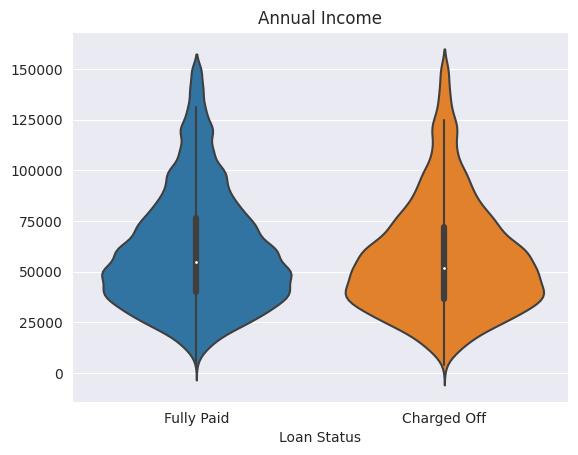

In [125]:
plt.figure()
sns.violinplot(data=data_df, x='loan_status', y='annual_inc')
# ax.bar_label(ax.containers[0])
plt.title("Annual Income")
plt.xlabel("Loan Status")
plt.ylabel("")
plt.show()

### Segmenting based on Terms

#### Loan Amount, Funded Amount, Investor Amounts

**Mean**

In [126]:
temp_df = data_df.groupby(['term']).agg({'loan_amnt': 'mean', 'funded_amnt':'mean', 'funded_amnt_inv':'mean'}).reset_index()
temp_df.columns = ['term', 'loan_amount', 'funded_amount', 'funded_amount_inv']
temp_df

term   loan_amount  funded_amount  funded_amount_inv
0    36   8810.353353    8695.353923        8117.371825
1    60  13317.670365   12720.609422       12431.981644

In [127]:
temp_df = temp_df.melt(id_vars='term', var_name='agg_fn', value_name='agg_value')
temp_df

term             agg_fn     agg_value
0    36        loan_amount   8810.353353
1    60        loan_amount  13317.670365
2    36      funded_amount   8695.353923
3    60      funded_amount  12720.609422
4    36  funded_amount_inv   8117.371825
5    60  funded_amount_inv  12431.981644

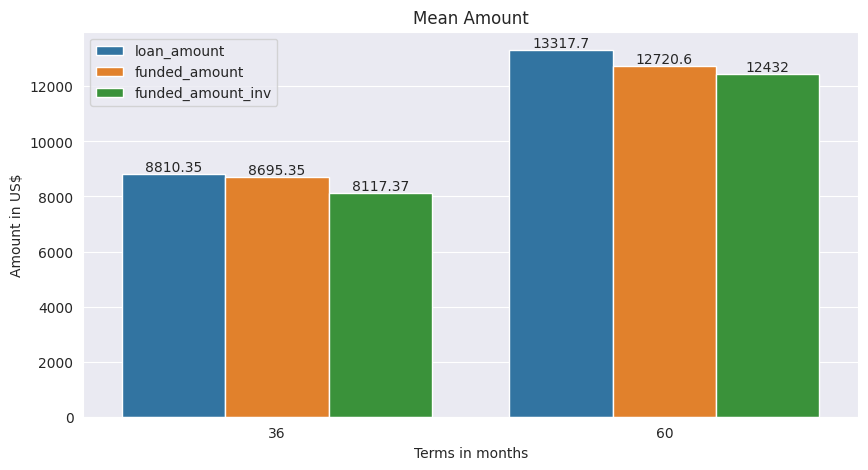

In [128]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=temp_df, x='term', y='agg_value', hue='agg_fn')
ax.bar_label(ax.containers[0])# fmt="{:0f}")
ax.bar_label(ax.containers[1])# fmt="{:0.1f}")
ax.bar_label(ax.containers[2])# fmt="{:0.1f}")
plt.title("Mean Amount")
plt.xlabel("Terms in months")
plt.ylabel("Amount in US$")
plt.legend()
plt.show()

**Median**

In [129]:
temp_df = data_df.groupby(['term']).agg({'loan_amnt': 'median',
                                                'funded_amnt':'median',
                                                'funded_amnt_inv':'median'}).reset_index()
temp_df.columns = ['term', 'loan_amount', 'funded_amount', 'funded_amount_inv']
temp_df

term  loan_amount  funded_amount  funded_amount_inv
0    36       7500.0         7500.0             7000.0
1    60      12000.0        12000.0            11750.0

In [130]:
temp_df = temp_df.melt(id_vars='term', var_name='agg_fn', value_name='agg_value')
temp_df

term             agg_fn  agg_value
0    36        loan_amount     7500.0
1    60        loan_amount    12000.0
2    36      funded_amount     7500.0
3    60      funded_amount    12000.0
4    36  funded_amount_inv     7000.0
5    60  funded_amount_inv    11750.0

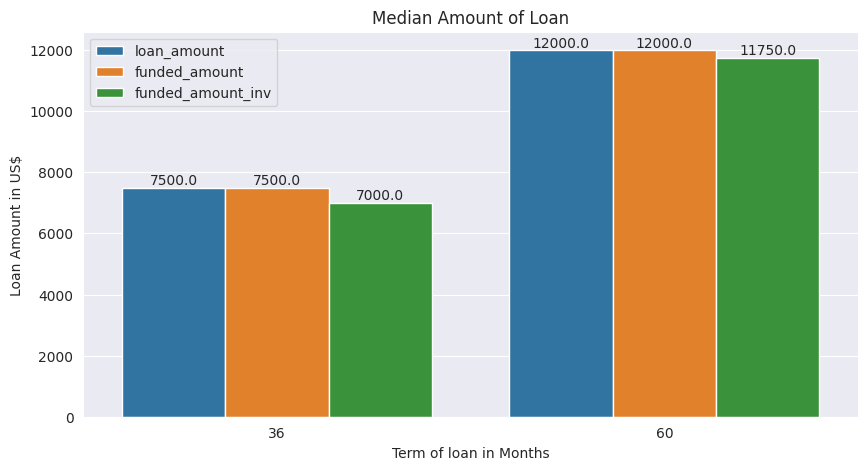

In [131]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=temp_df, x='term', y='agg_value', hue='agg_fn')
ax.bar_label(ax.containers[0], fmt="{:0.1f}")
ax.bar_label(ax.containers[1], fmt="{:0.1f}")
ax.bar_label(ax.containers[2], fmt="{:0.1f}")
plt.title("Median Amount of Loan")
plt.xlabel("Term of loan in Months")
plt.ylabel("Loan Amount in US$")
plt.legend()
plt.show()
del temp_df

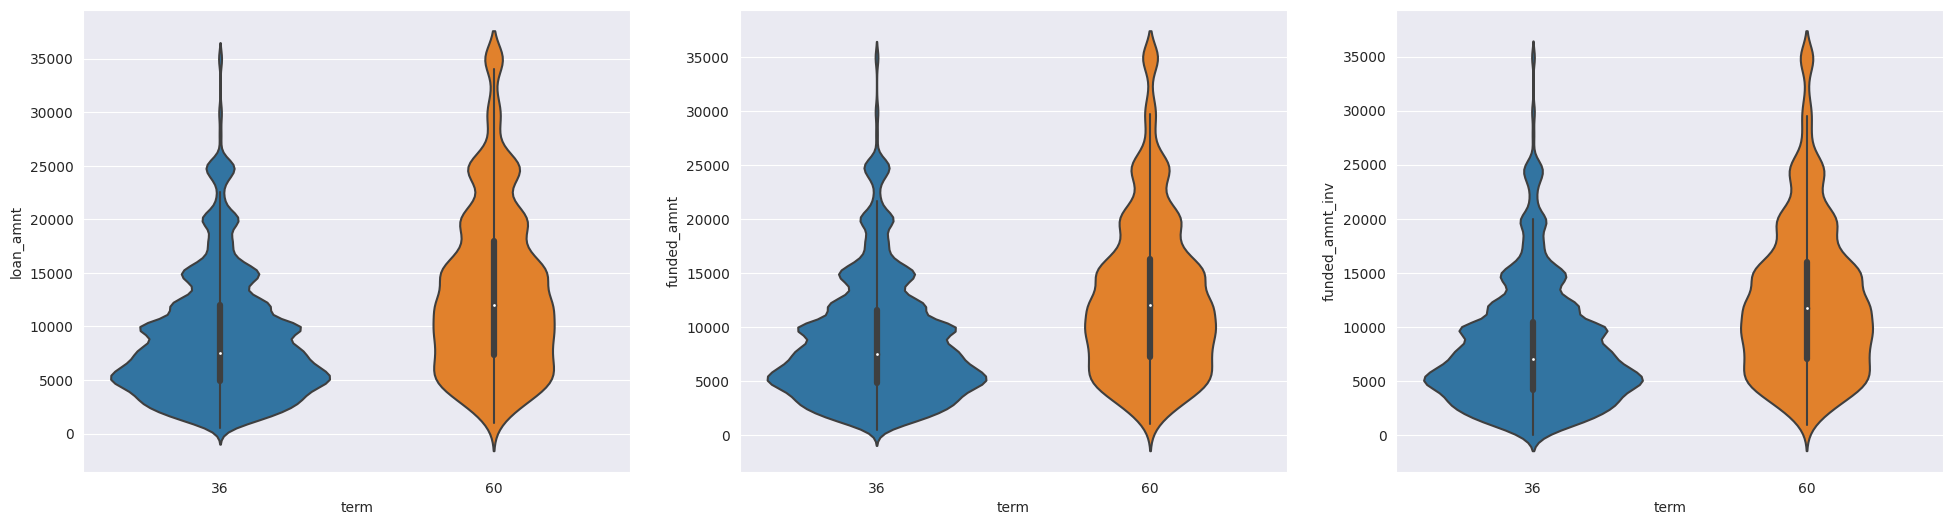

In [132]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))
sns.violinplot(data=data_df, x='term', y='loan_amnt', ax=ax[0])
sns.violinplot(data=data_df, x='term', y='funded_amnt', ax=ax[1])
sns.violinplot(data=data_df, x='term', y='funded_amnt_inv', ax=ax[2])
plt.show()

#### Interest Rate

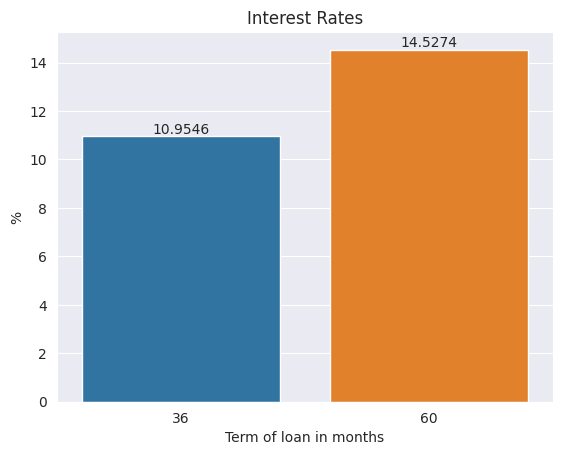

In [133]:
plt.figure()
ax = sns.barplot(data=data_df, x='term', y='int_rate', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Interest Rates")
plt.xlabel("Term of loan in months")
plt.ylabel("%")
plt.show()

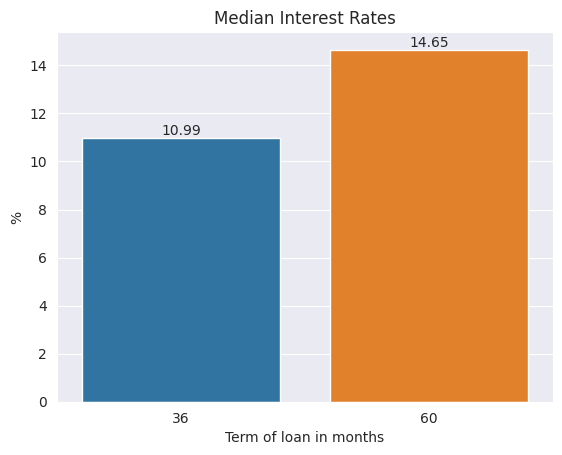

In [134]:
plt.figure()
ax = sns.barplot(data=data_df, x='term', y='int_rate', estimator='median', errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Median Interest Rates")
plt.xlabel("Term of loan in months")
plt.ylabel("%")
plt.show()

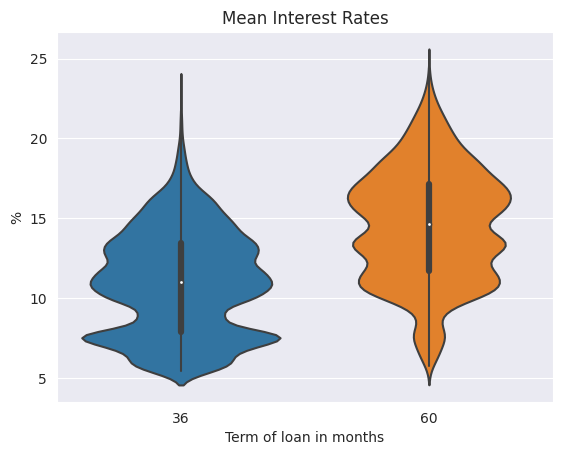

In [135]:
plt.figure()
sns.violinplot(data=data_df, x='term', y='int_rate')
plt.title("Mean Interest Rates")
plt.xlabel("Term of loan in months")
plt.ylabel("%")
plt.show()

#### Installment

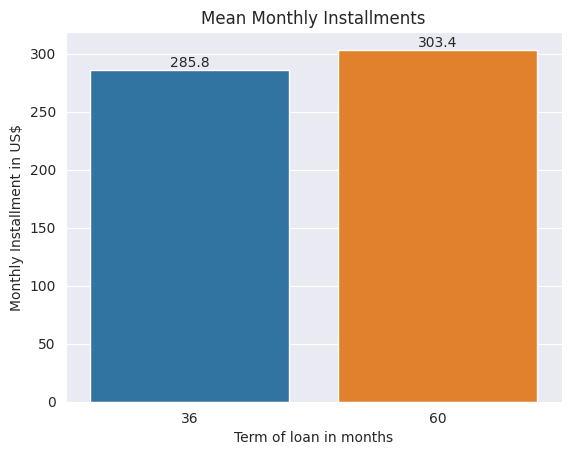

In [136]:
plt.figure()
ax = sns.barplot(data=data_df, x='term', y='installment', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0], fmt="{:0.1f}")
plt.title("Mean Monthly Installments")
plt.xlabel("Term of loan in months")
plt.ylabel("Monthly Installment in US$")
plt.show()

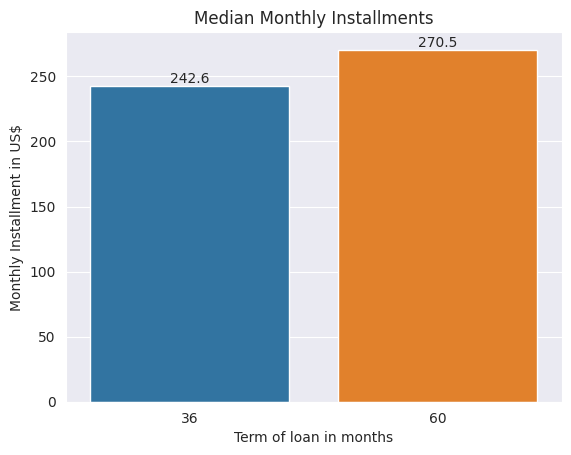

In [137]:
plt.figure()
ax = sns.barplot(data=data_df, x='term', y='installment', estimator='median', errorbar=None)
ax.bar_label(ax.containers[0], fmt="{:0.1f}")
plt.title("Median Monthly Installments")
plt.xlabel("Term of loan in months")
plt.ylabel("Monthly Installment in US$")
plt.show()

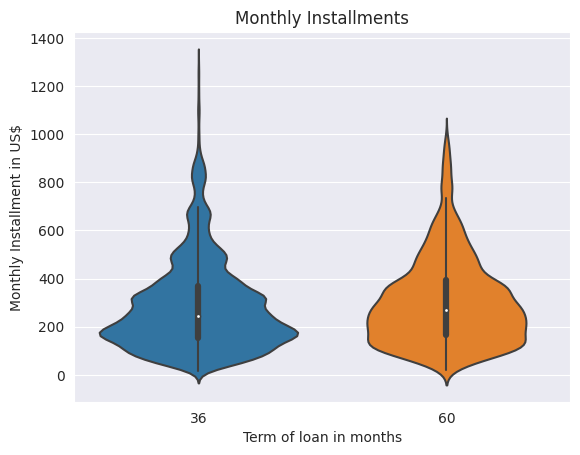

In [138]:
plt.figure()
ax = sns.violinplot(data=data_df, x='term', y='installment')
plt.title("Monthly Installments")
plt.xlabel("Term of loan in months")
plt.ylabel("Monthly Installment in US$")
plt.show()

#### Grade

In [139]:
a = data_df.groupby(['term', 'grade'])['id'].count().reset_index()
aa = a.groupby(['grade'])['id'].sum().reset_index()
a = a.merge(aa, how='inner', on='grade').drop_duplicates()
del aa
a.columns = ['term', 'grade', 'num_appln', 'total_grade']
a['percent_grade'] = a.num_appln * 100 / a.total_grade
a

term grade  num_appln  total_grade  percent_grade
0     36     A       8881         9229      96.229277
1     60     A        348         9229       3.770723
2     36     B       8321        10057      82.738391
3     60     B       1736        10057      17.261609
4     36     C       5234         6772      77.288836
5     60     C       1538         6772      22.711164
6     36     D       2890         4308      67.084494
7     60     D       1418         4308      32.915506
8     36     E        750         1985      37.783375
9     60     E       1235         1985      62.216625
10    36     F        171          691      24.746744
11    60     F        520          691      75.253256
12    36     G         44          190      23.157895
13    60     G        146          190      76.842105

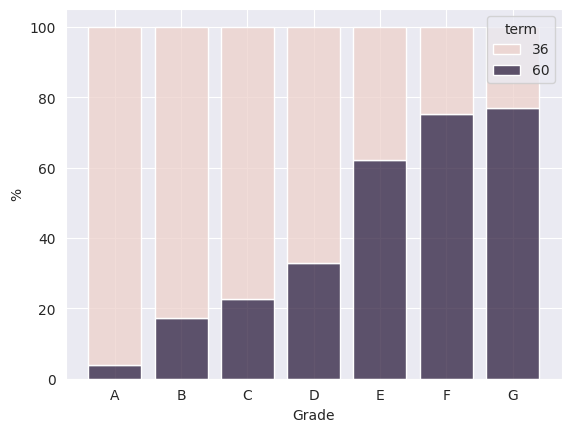

In [140]:
plt.figure()
sns.histplot(data=a, x='grade', weights='percent_grade', hue='term', multiple='stack', shrink=0.8)
plt.title("Grade-wise distribution across term of loan")
plt.xlabel("Grade")
plt.ylabel('%')
plt.xticks(rotation=0)
plt.title("")
plt.show()

#### Debt-to-Income

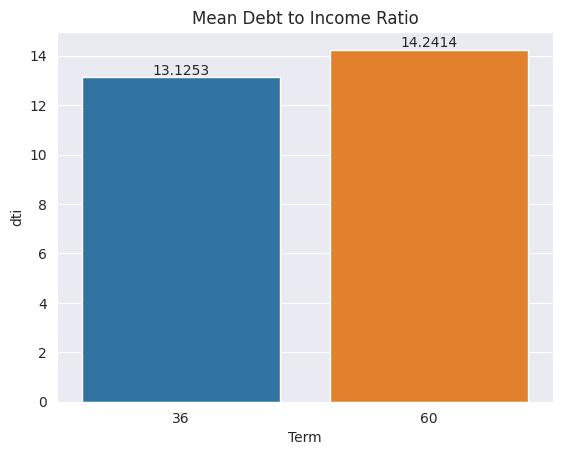

In [141]:
plt.figure()
ax = sns.barplot(data=data_df, x='term', y='dti', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Mean Debt to Income Ratio")
plt.xlabel("Term")
# plt.ylabel("%")
plt.show()

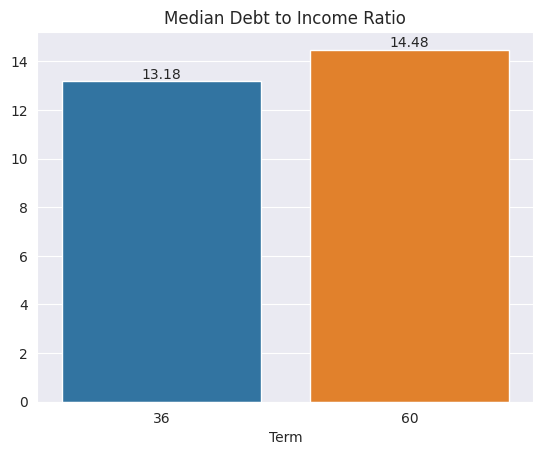

In [142]:
plt.figure()
ax = sns.barplot(data=data_df, x='term', y='dti', estimator='median', errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Median Debt to Income Ratio")
plt.xlabel("Term")
plt.ylabel("")
plt.show()

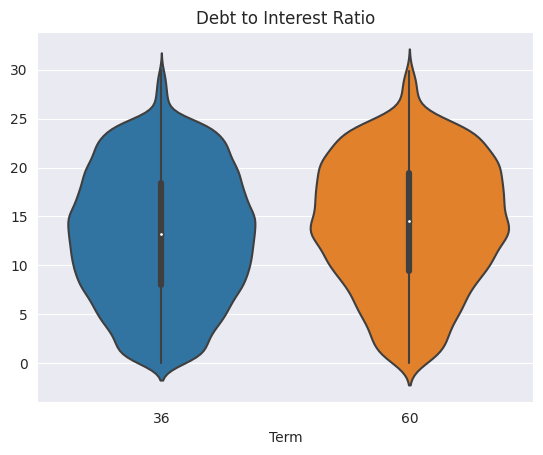

In [143]:
plt.figure()
sns.violinplot(data=data_df, x='term', y='dti')
# ax.bar_label(ax.containers[0])
plt.title("Debt to Interest Ratio")
plt.xlabel("Term")
plt.ylabel("")
plt.show()

#### Address State

In [144]:
a = data_df.groupby(['term', 'addr_state'])['id'].count().reset_index()
aa = a.groupby(['addr_state'])['id'].sum().reset_index()
a = a.merge(aa, how='inner', on='addr_state').drop_duplicates()
del aa
a.columns = ['term', 'addr_state', 'num_appln', 'total_state']
a['percent_state'] = a.num_appln * 100 / a.total_state
a = a.sort_values(by='total_state', ascending=False)
a

term addr_state  num_appln  total_state  percent_state
9     60         CA       1181         6001      19.680053
8     36         CA       4820         6001      80.319947
60    36         NY       2549         3143      81.100859
61    60         NY        594         3143      18.899141
19    60         FL        520         2447      21.250511
18    36         FL       1927         2447      78.749489
78    60         TX        414         2235      18.523490
77    36         TX       1821         2235      81.476510
54    36         NJ       1191         1518      78.458498
55    60         NJ        327         1518      21.541502
68    36         PA        988         1284      76.947040
69    60         PA        296         1284      23.052960
26    36         IL       1019         1280      79.609375
27    60         IL        261         1280      20.390625
21    60         GA        255         1171      21.776260
20    36         GA        916         1171      78.223740
81    36         VA        917         1157      79.256698
82    60         VA        240         1157      20.743302
36    60         MA        208         1108      18.772563
35    36         MA        900         1108      81.227437
62    36         OH        812         1049      77.407054
63    60         OH        237         1049      22.592946
37    36         MD        656          874      75.057208
38    60         MD        218          874      24.942792
7     60         AZ        157          731      21.477428
6     36         AZ        574          731      78.522572
86    60         WA        142          723      19.640387
85    36         WA        581          723      80.359613
11    60         CO        131          666      19.669670
10    36         CO        535          666      80.330330
50    60         NC        167          633      26.382306
49    36         NC        466          633      73.617694
40    36         MI        453          606      74.752475
41    60         MI        153          606      25.247525
13    60         CT        135          602      22.425249
12    36         CT        467          602      77.574751
44    36         MO        454          584      77.739726
45    60         MO        130          584      22.260274
43    60         MN        110          540      20.370370
42    36         MN        430          540      79.629630
59    60         NV        103          413      24.939467
58    36         NV        310          413      75.060533
72    36         SC        300          401      74.812968
73    60         SC        101          401      25.187032
2     36         AL        295          386      76.424870
66    36         OR        306          386      79.274611
67    60         OR         80          386      20.725389
3     60         AL         91          386      23.575130
87    36         WI        283          375      75.466667
88    60         WI         92          375      24.533333
34    60         LA         80          365      21.917808
33    36         LA        285          365      78.082192
32    60         KY         66          270      24.444444
31    36         KY        204          270      75.555556
65    60         OK         60          251      23.904382
64    36         OK        191          251      76.095618
30    60         KS         37          215      17.209302
29    36         KS        178          215      82.790698
79    36         UT        164          207      79.227053
80    60         UT         43          207      20.772947
4     36         AR        163          205      79.512195
5     60         AR         42          205      20.487805
70    36         RI        140          172      81.395349
71    60         RI         32          172      18.604651
15    60         DC         25          167      14.970060
14    36         DC        142          167      85.029940
57    60         NM         37          165      22

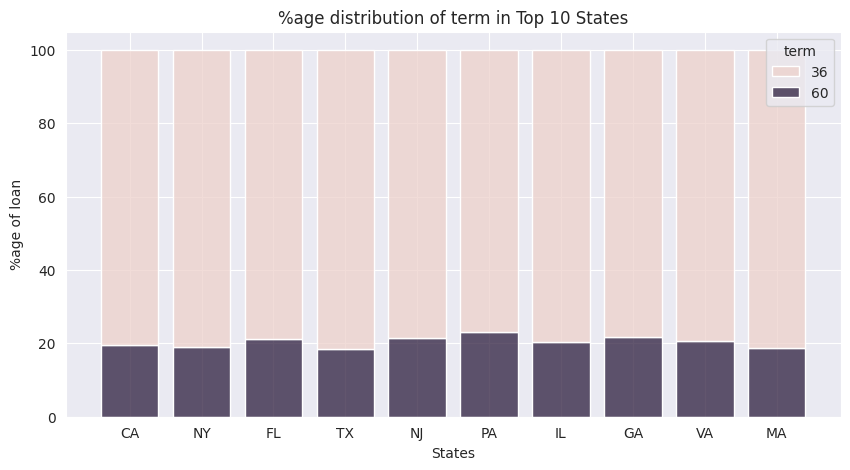

In [145]:
plt.figure(figsize=(10, 5))
# ax = sns.barplot(data=a.iloc[:10], x='addr_state', y='percent_state', hue='term')
# ax.bar_label(ax.containers[0], fmt="{:0.1f}%")
# ax.bar_label(ax.containers[1], fmt="{:0.1f}%")
sns.histplot(data=a.iloc[:20], x='addr_state', weights='percent_state',
             hue='term', multiple='stack', shrink=0.8)
plt.title('%age distribution of term in Top 10 States')
plt.xlabel('States')
plt.ylabel('%age of loan')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# del a

#### Purpose

In [146]:
a = data_df.groupby(['term', 'purpose'])['id'].count().reset_index()
aa = a.groupby(['purpose'])['id'].sum().reset_index()
a = a.merge(aa, how='inner', on='purpose').drop_duplicates()
del aa
a.columns = ['term', 'purpose', 'num_appln', 'total_per_purpose']
a['percent_purpose'] = a.num_appln * 100 / a.total_per_purpose
a = a.sort_values(by=['total_per_purpose', 'term'], ascending=[False, True])
a = a[['term', 'purpose', 'percent_purpose']]

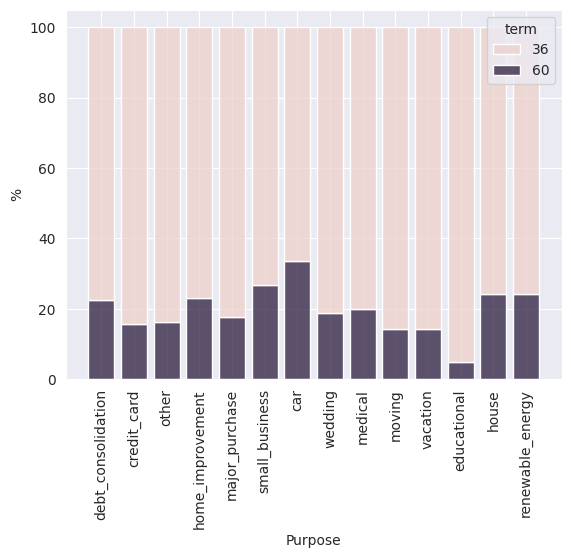

In [147]:
plt.figure()
sns.histplot(data=a, x='purpose', weights='percent_purpose', hue='term', multiple='stack', shrink=0.8)
plt.title('Purpose-wise distribution')
plt.xlabel("Purpose")
plt.ylabel('%')
plt.xticks(rotation=90)
plt.title("")
plt.show()

#### Home Ownership

In [148]:
a = data_df.groupby(['term', 'home_ownership'])['id'].count().reset_index()
aa = a.groupby(['home_ownership'])['id'].sum().reset_index()
a = a.merge(aa, how='inner', on='home_ownership').drop_duplicates()
del aa
a.columns = ['term', 'home_ownership', 'num_appln', 'total_per_term']
a['percent_term'] = a.num_appln * 100 / a.total_per_term
a = a.sort_values(by=['total_per_term', 'term'], ascending=[False, True])
a = a[['term', 'home_ownership', 'percent_term']]

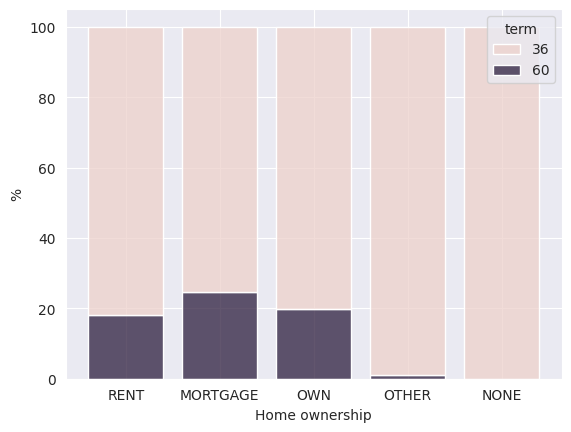

In [149]:
plt.figure()
sns.histplot(data=a, x='home_ownership', weights='percent_term', hue='term', multiple='stack', shrink=0.8)
plt.xlabel("Home ownership")
plt.ylabel('%')
plt.title("")
plt.show()

#### Reloving Utilization

<Axes: xlabel='term', ylabel='revol_util'>

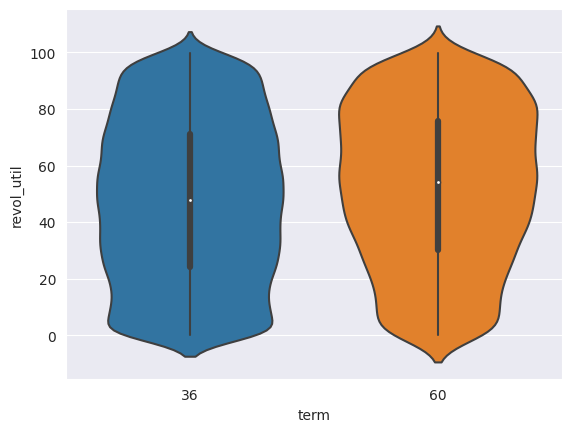

In [150]:
sns.violinplot(data=data_df, x='term', y='revol_util')

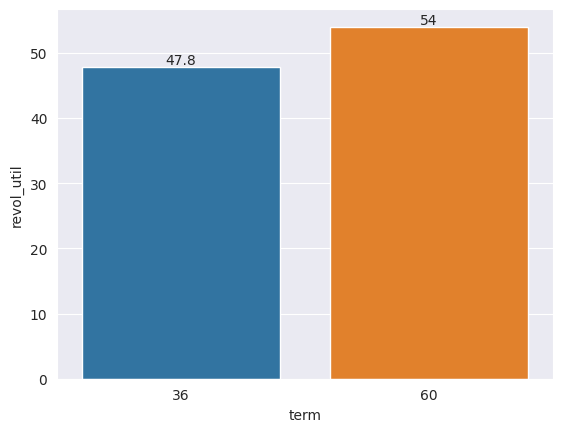

In [151]:
ax = sns.barplot(data=data_df, x='term', y='revol_util', estimator='median', errorbar=None)
ax.bar_label(ax.containers[0])
plt.show()

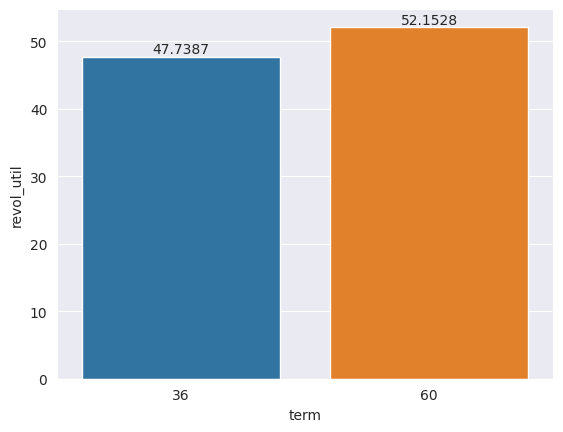

In [152]:
ax = sns.barplot(data=data_df, x='term', y='revol_util', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0])
plt.show()

#### Annual Income

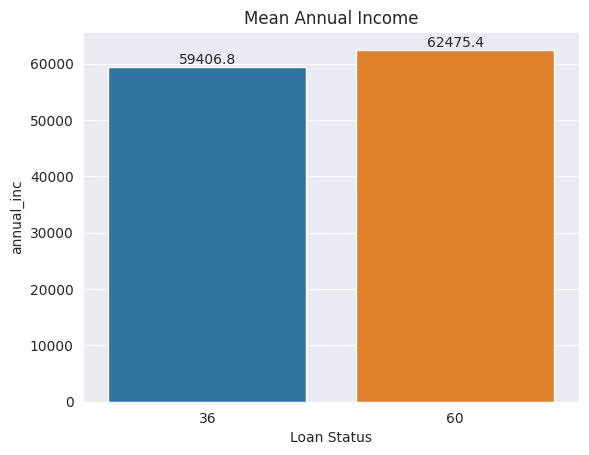

In [153]:
plt.figure()
ax = sns.barplot(data=data_df, x='term', y='annual_inc', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Mean Annual Income")
plt.xlabel("Loan Status")
# plt.ylabel("%")
plt.show()

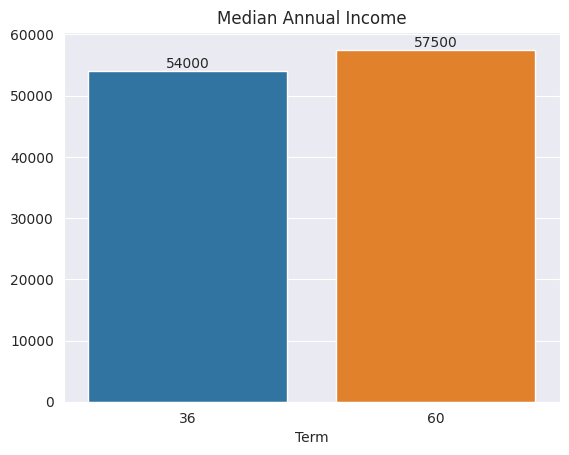

In [154]:
plt.figure()
ax = sns.barplot(data=data_df, x='term', y='annual_inc', estimator='median', errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Median Annual Income")
plt.xlabel("Term")
plt.ylabel("")
plt.show()

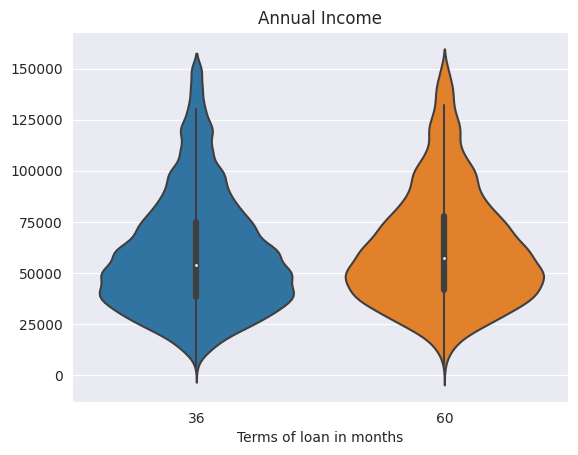

In [155]:
plt.figure()
sns.violinplot(data=data_df, x='term', y='annual_inc')
# ax.bar_label(ax.containers[0])
plt.title("Annual Income")
plt.xlabel("Terms of loan in months")
plt.ylabel("")
plt.show()

### Segmentating based on Purpose

#### Loan Amount, Funded Amount, Investor Amounts

**Mean**

In [156]:
temp_df = data_df.groupby(['purpose']).agg({'loan_amnt': 'mean', 'funded_amnt':'mean', 'funded_amnt_inv':'mean'}).reset_index()
temp_df.columns = ['purpose', 'loan_amount', 'funded_amount', 'funded_amount_inv']
temp_df

purpose   loan_amount  funded_amount  funded_amount_inv
0                  car   6339.797729    6285.663591        6096.831186
1          credit_card  10401.361329   10165.009229        9620.020307
2   debt_consolidation  11134.693407   10879.238293       10339.027508
3          educational   6382.236842    6255.674342        5170.738384
4     home_improvement   9341.415663    9133.164802        8640.490750
5                house  10776.384083   10588.494810       10075.729500
6       major_purchase   7165.179949    7024.010283        6731.251012
7              medical   7235.204918    7139.057377        6856.665736
8               moving   5783.985102    5681.936685        5469.673708
9                other   7054.808239    6914.687500        6459.537332
10    renewable_energy   7158.333333    7055.172414        6646.957797
11      small_business  12026.219105   11623.847695       10478.381368
12            vacation   5144.583333    5055.833333        4872.240575
13             wedding   8967.406963    8862.755102        8296.271673

In [157]:
temp_df = temp_df.melt(id_vars='purpose', var_name='agg_fn', value_name='agg_value')
temp_df

purpose             agg_fn     agg_value
0                  car        loan_amount   6339.797729
1          credit_card        loan_amount  10401.361329
2   debt_consolidation        loan_amount  11134.693407
3          educational        loan_amount   6382.236842
4     home_improvement        loan_amount   9341.415663
5                house        loan_amount  10776.384083
6       major_purchase        loan_amount   7165.179949
7              medical        loan_amount   7235.204918
8               moving        loan_amount   5783.985102
9                other        loan_amount   7054.808239
10    renewable_energy        loan_amount   7158.333333
11      small_business        loan_amount  12026.219105
12            vacation        loan_amount   5144.583333
13             wedding        loan_amount   8967.406963
14                 car      funded_amount   6285.663591
15         credit_card      funded_amount  10165.009229
16  debt_consolidation      funded_amount  10879.238293
17         educational      funded_amount   6255.674342
18    home_improvement      funded_amount   9133.164802
19               house      funded_amount  10588.494810
20      major_purchase      funded_amount   7024.010283
21             medical      funded_amount   7139.057377
22              moving      funded_amount   5681.936685
23               other      funded_amount   6914.687500
24    renewable_energy      funded_amount   7055.172414
25      small_business      funded_amount  11623.847695
26            vacation      funded_amount   5055.833333
27             wedding      funded_amount   8862.755102
28                 car  funded_amount_inv   6096.831186
29         credit_card  funded_amount_inv   9620.020307
30  debt_consolidation  funded_amount_inv  10339.027508
31         educational  funded_amount_inv   5170.738384
32    home_improvement  funded_amount_inv   8640.490750
33               house  funded_amount_inv  10075.729500
34      major_purchase  funded_amount_inv   6731.251012
35             medical  funded_amount_inv   6856.665736
36              moving  funded_amount_inv   5469.673708
37               other  funded_amount_inv   6459.537332
38    renewable_energy  funded_amount_inv   6646.957797
39      small_business  funded_amount_inv  10478.381368
40            vacation  funded_amount_inv   4872.240575
41             wedding  funded_amount_inv   8296.271673

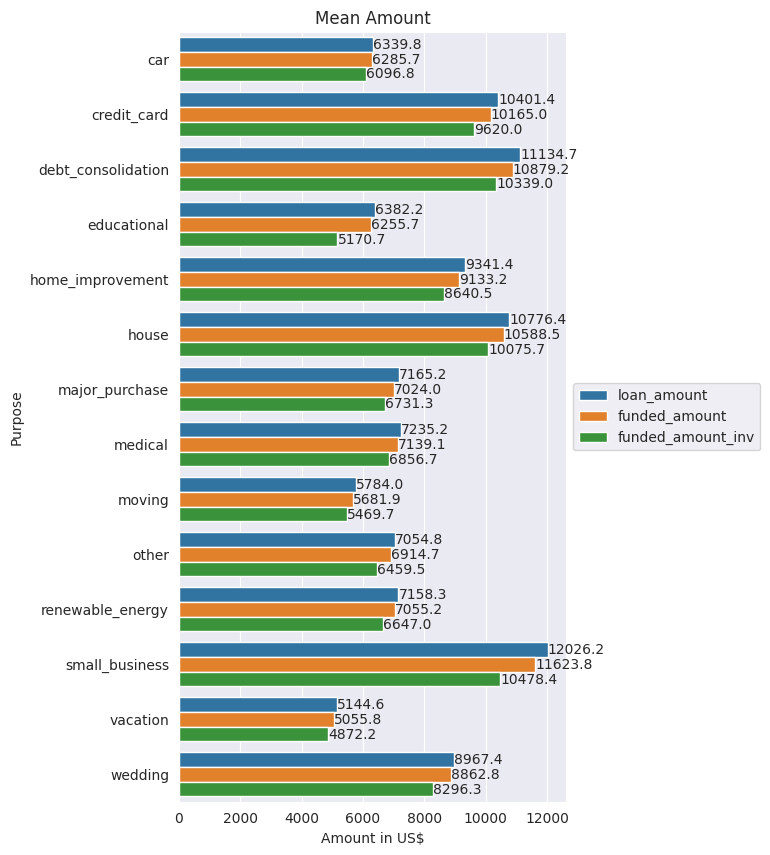

In [158]:
plt.figure(figsize=(5, 10))
ax = sns.barplot(data=temp_df, y='purpose', x='agg_value', hue='agg_fn', orient='h')
ax.bar_label(ax.containers[0], fmt="{:0.1f}")
ax.bar_label(ax.containers[1], fmt="{:0.1f}")
ax.bar_label(ax.containers[2], fmt="{:0.1f}")
plt.title("Mean Amount")
plt.ylabel("Purpose")
plt.xlabel("Amount in US$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Median**

In [159]:
temp_df = data_df.groupby(['purpose']).agg({'loan_amnt': 'median',
                                                'funded_amnt':'median',
                                                'funded_amnt_inv':'median'}).reset_index()
temp_df.columns = ['purpose', 'loan_amount', 'funded_amount', 'funded_amount_inv']
temp_df

purpose  loan_amount  funded_amount  funded_amount_inv
0                  car       5600.0         5500.0        5400.000000
1          credit_card       9412.5         9000.0        8603.538403
2   debt_consolidation      10000.0        10000.0        9364.105368
3          educational       5000.0         5000.0        4266.366241
4     home_improvement       8000.0         7800.0        7250.000000
5                house       9750.0         9600.0        8275.000000
6       major_purchase       6000.0         6000.0        5600.000000
7              medical       5787.5         5650.0        5300.512478
8               moving       4800.0         4800.0        4500.000000
9                other       5500.0         5450.0        5000.000000
10    renewable_energy       5000.0         5000.0        4875.000000
11      small_business      10000.0        10000.0        8999.994155
12            vacation       4200.0         4200.0        4000.000000
13             wedding       7800.0         7750.0        7250.000000

In [160]:
temp_df = temp_df.melt(id_vars='purpose', var_name='agg_fn', value_name='agg_value')
temp_df

purpose             agg_fn     agg_value
0                  car        loan_amount   5600.000000
1          credit_card        loan_amount   9412.500000
2   debt_consolidation        loan_amount  10000.000000
3          educational        loan_amount   5000.000000
4     home_improvement        loan_amount   8000.000000
5                house        loan_amount   9750.000000
6       major_purchase        loan_amount   6000.000000
7              medical        loan_amount   5787.500000
8               moving        loan_amount   4800.000000
9                other        loan_amount   5500.000000
10    renewable_energy        loan_amount   5000.000000
11      small_business        loan_amount  10000.000000
12            vacation        loan_amount   4200.000000
13             wedding        loan_amount   7800.000000
14                 car      funded_amount   5500.000000
15         credit_card      funded_amount   9000.000000
16  debt_consolidation      funded_amount  10000.000000
17         educational      funded_amount   5000.000000
18    home_improvement      funded_amount   7800.000000
19               house      funded_amount   9600.000000
20      major_purchase      funded_amount   6000.000000
21             medical      funded_amount   5650.000000
22              moving      funded_amount   4800.000000
23               other      funded_amount   5450.000000
24    renewable_energy      funded_amount   5000.000000
25      small_business      funded_amount  10000.000000
26            vacation      funded_amount   4200.000000
27             wedding      funded_amount   7750.000000
28                 car  funded_amount_inv   5400.000000
29         credit_card  funded_amount_inv   8603.538403
30  debt_consolidation  funded_amount_inv   9364.105368
31         educational  funded_amount_inv   4266.366241
32    home_improvement  funded_amount_inv   7250.000000
33               house  funded_amount_inv   8275.000000
34      major_purchase  funded_amount_inv   5600.000000
35             medical  funded_amount_inv   5300.512478
36              moving  funded_amount_inv   4500.000000
37               other  funded_amount_inv   5000.000000
38    renewable_energy  funded_amount_inv   4875.000000
39      small_business  funded_amount_inv   8999.994155
40            vacation  funded_amount_inv   4000.000000
41             wedding  funded_amount_inv   7250.000000

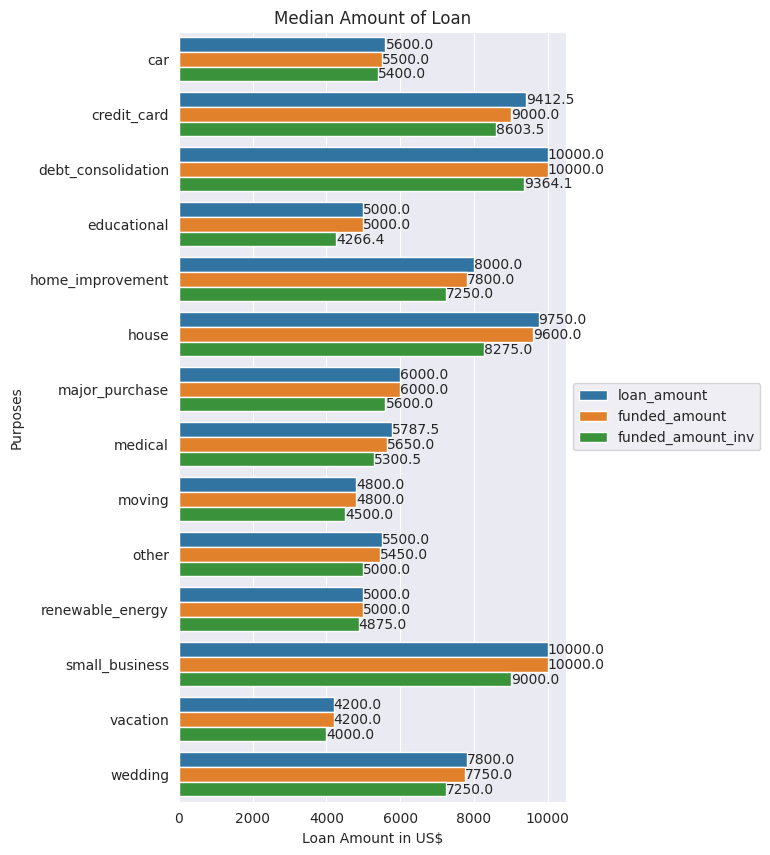

In [161]:
plt.figure(figsize=(5, 10))
ax = sns.barplot(data=temp_df, y='purpose', x='agg_value', hue='agg_fn', orient='h')
ax.bar_label(ax.containers[0], fmt="{:0.1f}")
ax.bar_label(ax.containers[1], fmt="{:0.1f}")
ax.bar_label(ax.containers[2], fmt="{:0.1f}")
plt.title("Median Amount of Loan")
plt.ylabel("Purposes")
plt.xlabel("Loan Amount in US$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
del temp_df

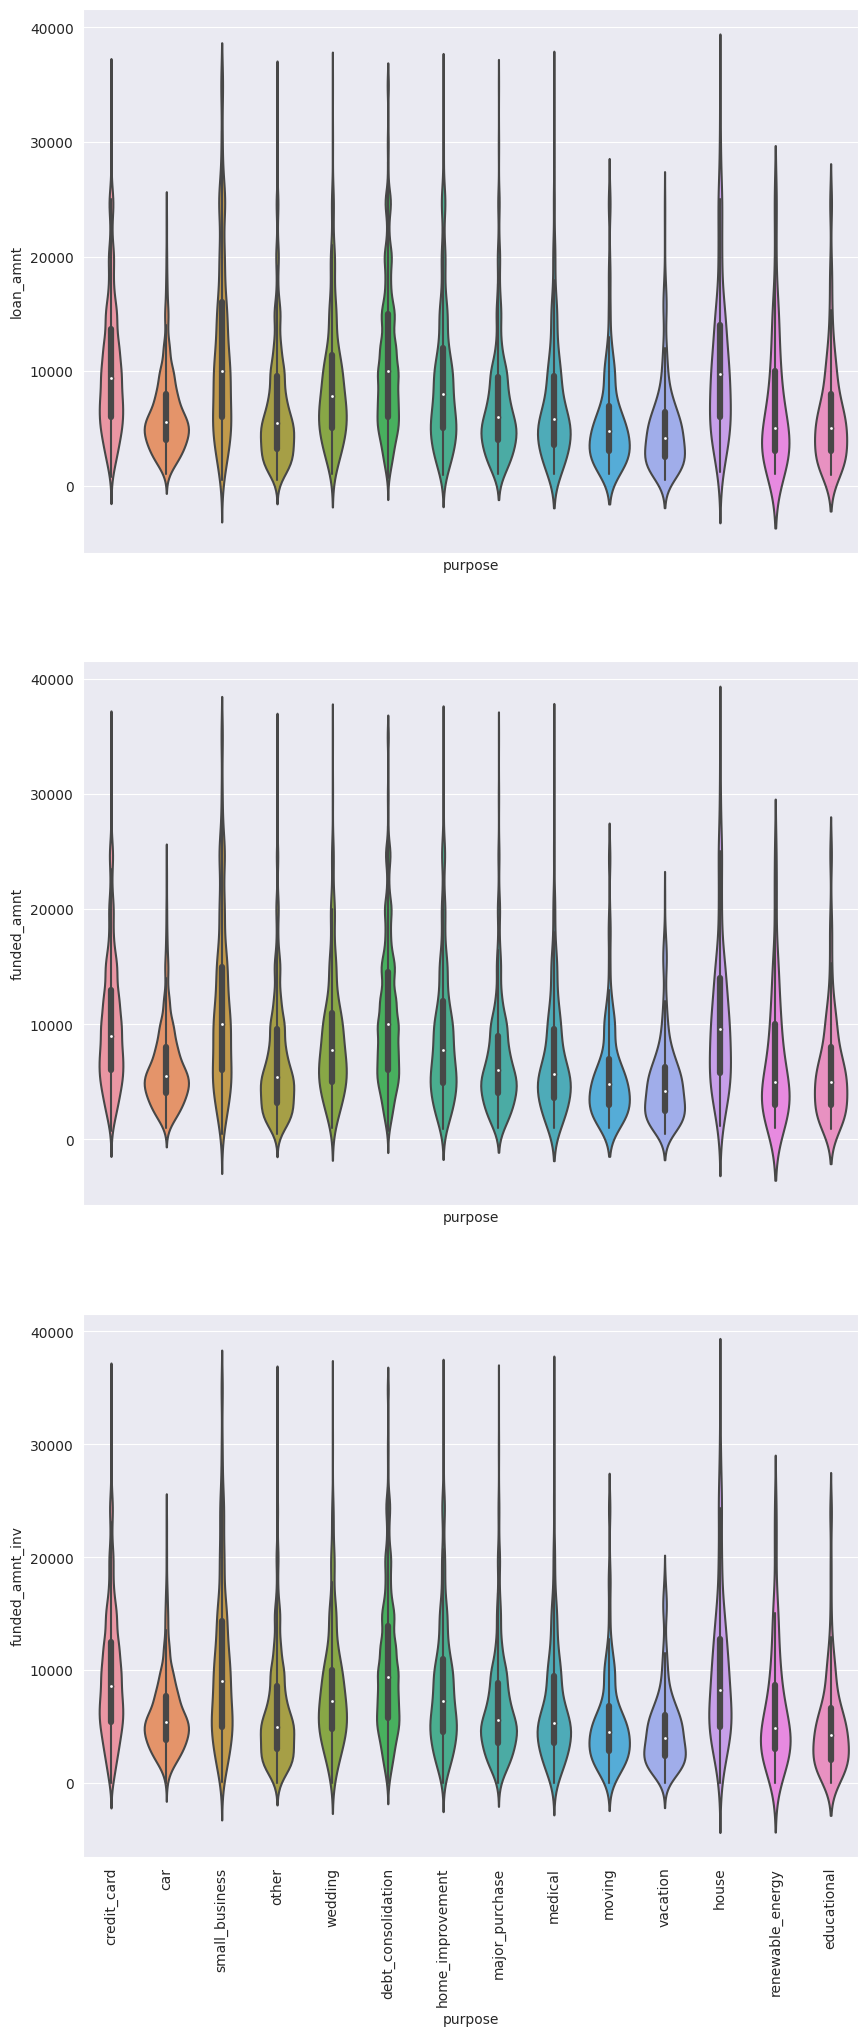

In [162]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 24), sharex=True)
sns.violinplot(data=data_df, x='purpose', y='loan_amnt', ax=ax[0])
sns.violinplot(data=data_df, x='purpose', y='funded_amnt', ax=ax[1])
sns.violinplot(data=data_df, x='purpose', y='funded_amnt_inv', ax=ax[2])
plt.xticks(rotation=90)
plt.show()

#### Interest Rate

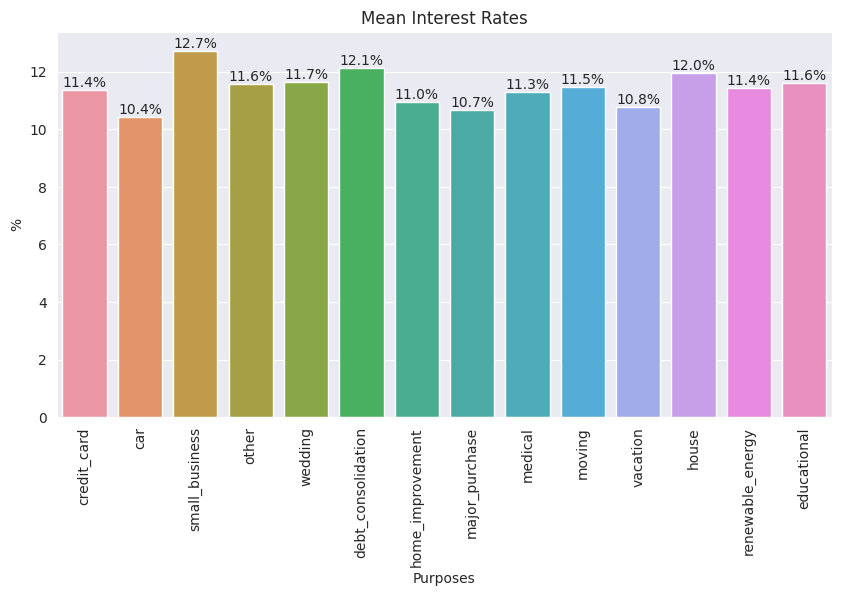

In [163]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=data_df, x='purpose', y='int_rate', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0], fmt="{0:.1f}%")
plt.title("Mean Interest Rates")
plt.xlabel("Purposes")
plt.ylabel("%")
plt.xticks(rotation=90)
plt.show()

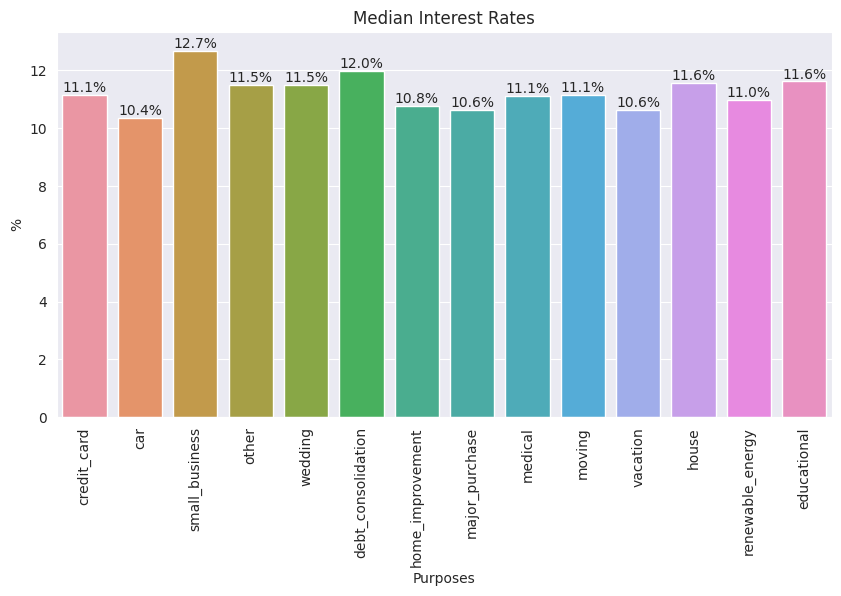

In [164]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=data_df, x='purpose', y='int_rate', estimator='median', errorbar=None)
ax.bar_label(ax.containers[0], fmt="{0:.1f}%")
plt.title("Median Interest Rates")
plt.xlabel("Purposes")
plt.ylabel("%")
plt.xticks(rotation=90)
plt.show()

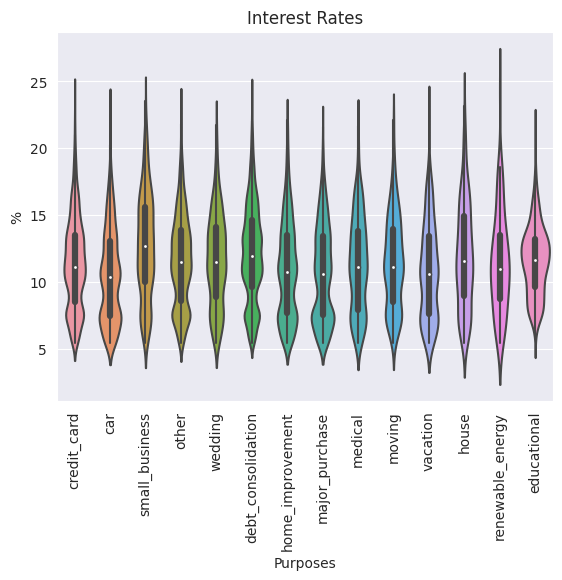

In [165]:
plt.figure()
sns.violinplot(data=data_df, x='purpose', y='int_rate')
plt.title("Interest Rates")
plt.xlabel("Purposes")
plt.ylabel("%")
plt.xticks(rotation=90)
plt.show()

#### Installment

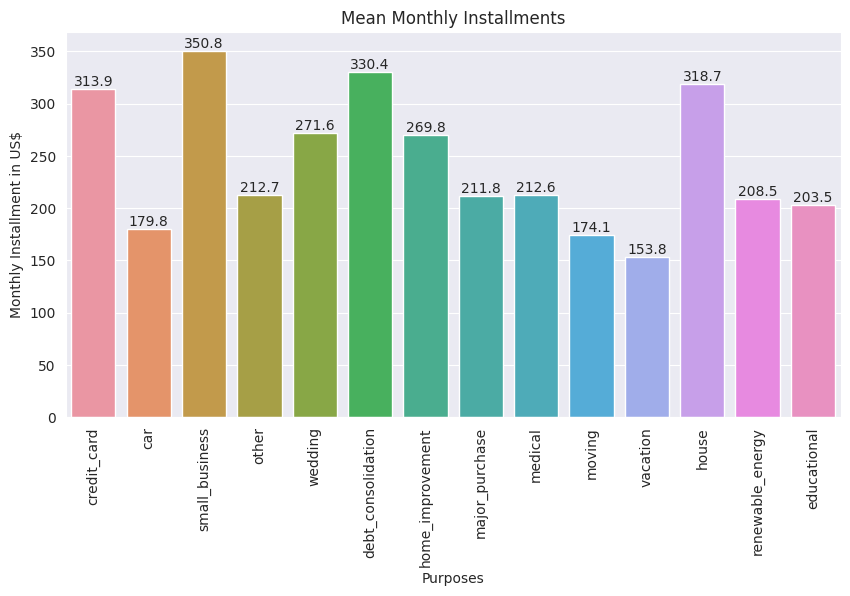

In [166]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=data_df, x='purpose', y='installment', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0], fmt="{:0.1f}")
plt.title("Mean Monthly Installments")
plt.xlabel("Purposes")
plt.ylabel("Monthly Installment in US$")
plt.xticks(rotation=90)
plt.show()

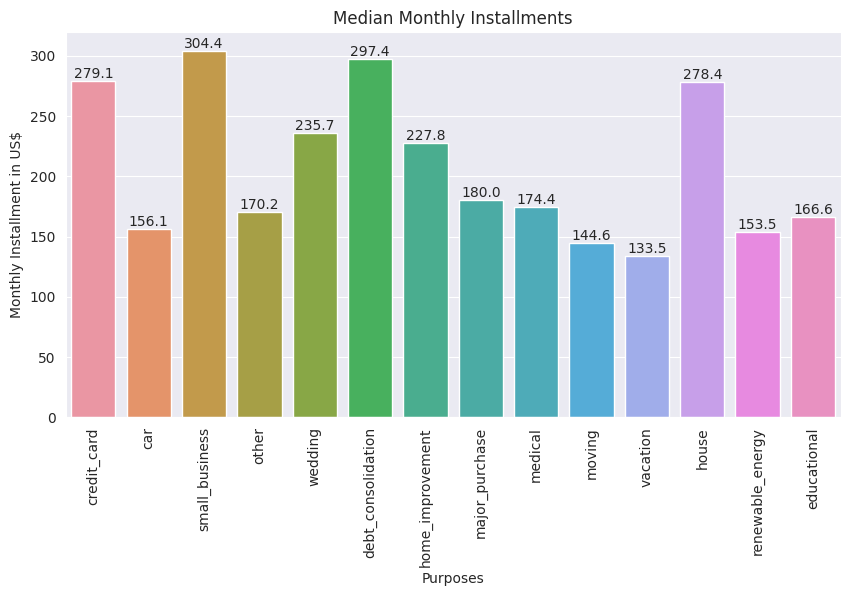

In [167]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=data_df, x='purpose', y='installment', estimator='median', errorbar=None)
ax.bar_label(ax.containers[0], fmt="{:0.1f}")
plt.title("Median Monthly Installments")
plt.xlabel("Purposes")
plt.ylabel("Monthly Installment in US$")
plt.xticks(rotation=90)
plt.show()

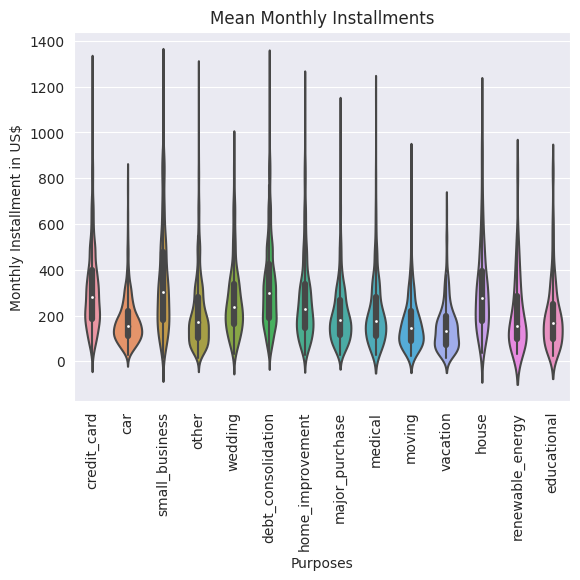

In [168]:
plt.figure()
ax = sns.violinplot(data=data_df, x='purpose', y='installment')
plt.title("Mean Monthly Installments")
plt.xlabel("Purposes")
plt.ylabel("Monthly Installment in US$")
plt.xticks(rotation=90)
plt.show()

#### Grade

In [169]:
a = data_df.groupby(['purpose', 'grade'])['id'].count().reset_index()
aa = a.groupby(['grade'])['id'].sum().reset_index()
a = a.merge(aa, how='inner', on='grade').drop_duplicates()
del aa
a.columns = ['purpose', 'grade', 'num_appln', 'total_grade']
a['percent_grade'] = a.num_appln * 100 / a.total_grade
a

purpose grade  num_appln  total_grade  percent_grade
0                  car     A        572         9229       6.197855
1          credit_card     A       1292         9229      13.999350
2   debt_consolidation     A       3500         9229      37.923935
3          educational     A         78         9229       0.845162
4     home_improvement     A        854         9229       9.253440
5                house     A         85         9229       0.921010
6       major_purchase     A        776         9229       8.408278
7              medical     A        191         9229       2.069563
8               moving     A        160         9229       1.733666
9                other     A       1018         9229      11.030448
10    renewable_energy     A         23         9229       0.249214
11      small_business     A        321         9229       3.478167
12            vacation     A        130         9229       1.408603
13             wedding     A        229         9229       2.481309
14                 car     B        435        10057       4.325346
15         credit_card     B       1416        10057      14.079745
16  debt_consolidation     B       4648        10057      46.216566
17         educational     B         94        10057       0.934672
18    home_improvement     B        673        10057       6.691856
19               house     B         80        10057       0.795466
20      major_purchase     B        516        10057       5.130755
21             medical     B        183        10057       1.819628
22              moving     B        171        10057       1.700308
23               other     B       1065        10057      10.589639
24    renewable_energy     B         33        10057       0.328130
25      small_business     B        381        10057       3.788406
26            vacation     B        116        10057       1.153425
27             wedding     B        246        10057       2.446057
28                 car     C        225         6772       3.322504
29         credit_card     C        893         6772      13.186651
30  debt_consolidation     C       3232         6772      47.725930
31         educational     C         86         6772       1.269935
32    home_improvement     C        406         6772       5.995275
33               house     C         51         6772       0.753101
34      major_purchase     C        346         6772       5.109273
35             medical     C        120         6772       1.772002
36              moving     C        109         6772       1.609569
37               other     C        764         6772      11.281748
38    renewable_energy     C         16         6772       0.236267
39      small_business     C        284         6772       4.193739
40            vacation     C         62         6772       0.915535
41             wedding     C        178         6772       2.628470
42                 car     D        115         4308       2.669452
43         credit_card     D        464         4308      10.770659
44  debt_consolidation     D       2241         4308      52.019499
45         educational     D         28         4308       0.649954
46    home_improvement     D        232         4308       5.385330
47               house     D         38         4308       0.882080
48      major_purchase     D        212         4308       4.921077
49             medical     D         74         4308       1.717734
50              moving     D         63         4308       1.462396
51               other     D        431         4308      10.004643
52    renewable_energy     D          7         4308       0.162488
53      small_business     D        252         4308       5.849582
54            vacation     D         30         4308       0.696379
55             wedding     D        121         4308       2.808728
56                 car     E         51         1985       2.569270
57         credit_card     E        193         1985       9.722922
58 

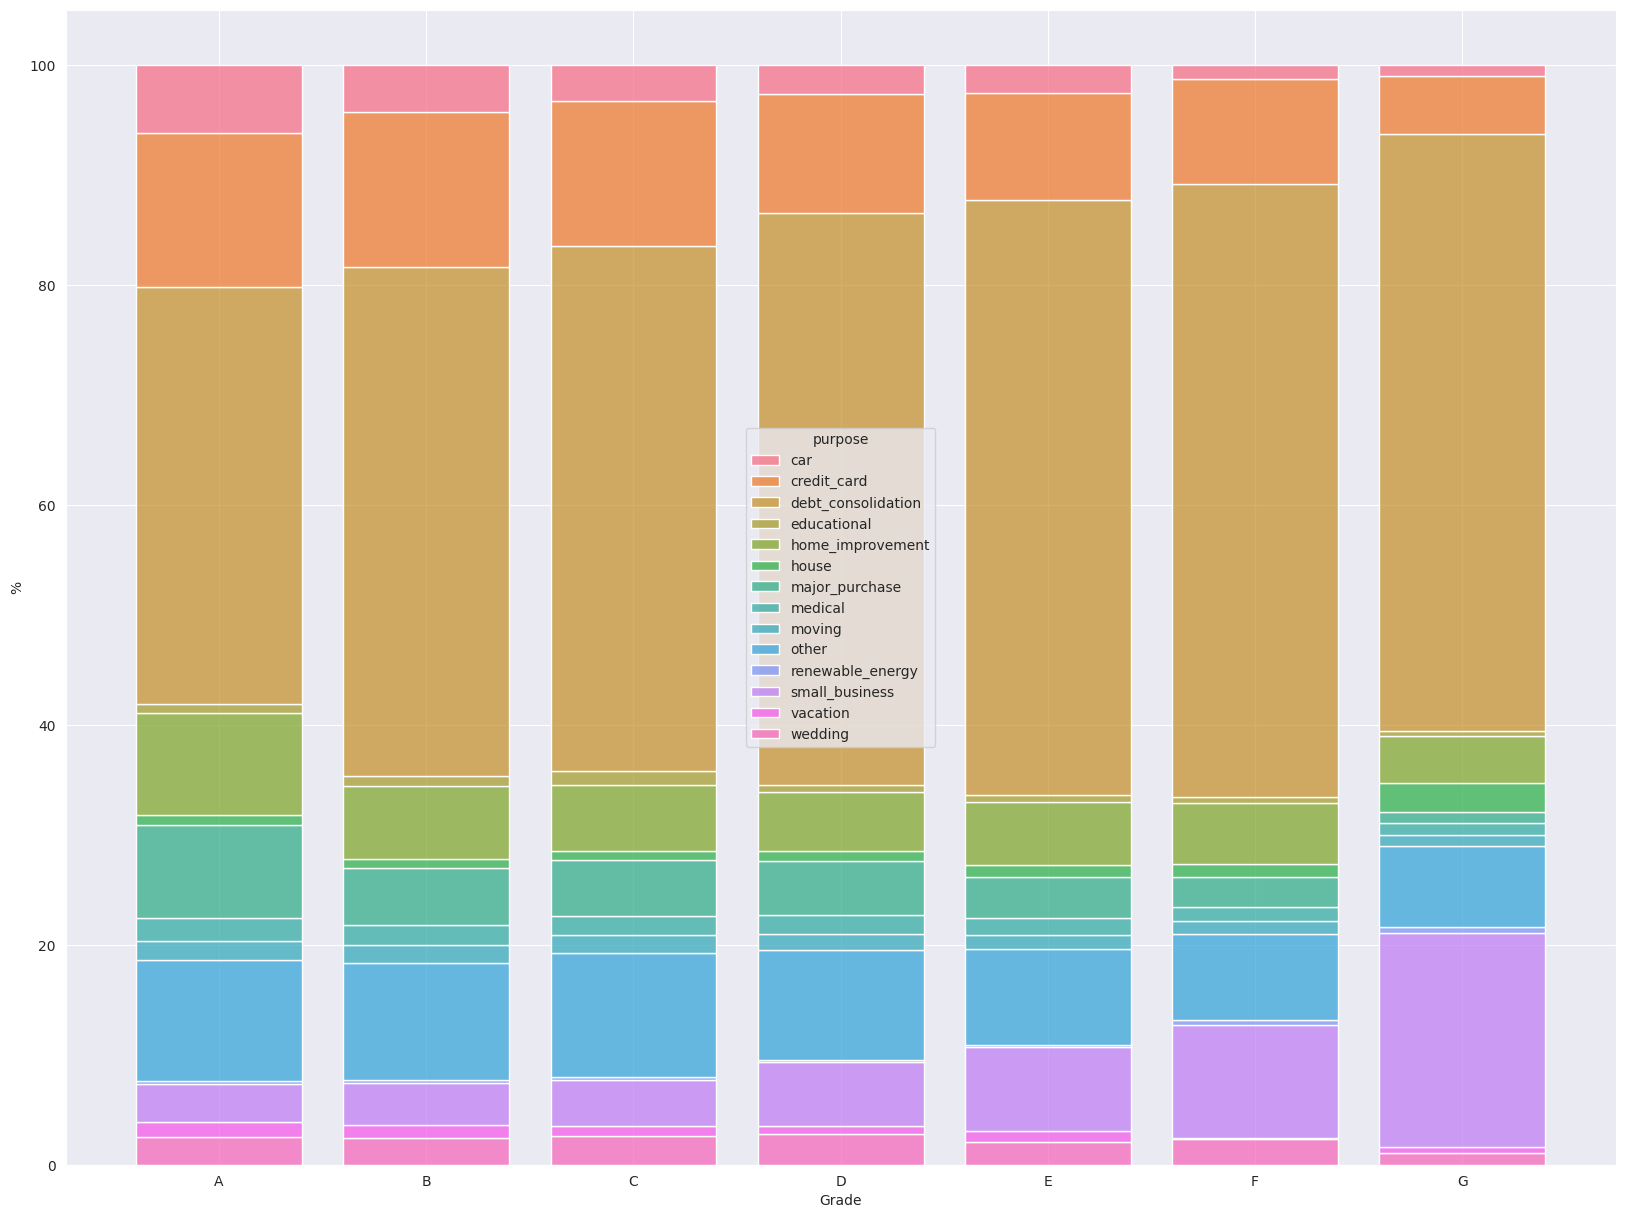

In [170]:
plt.figure(figsize=(20, 15))
sns.histplot(data=a, x='grade', weights='percent_grade', hue='purpose', multiple='stack', shrink=0.8)
plt.xlabel("Grade")
plt.ylabel('%')
plt.xticks(rotation=0)
plt.title("")
plt.show()

#### Debt-to-Income

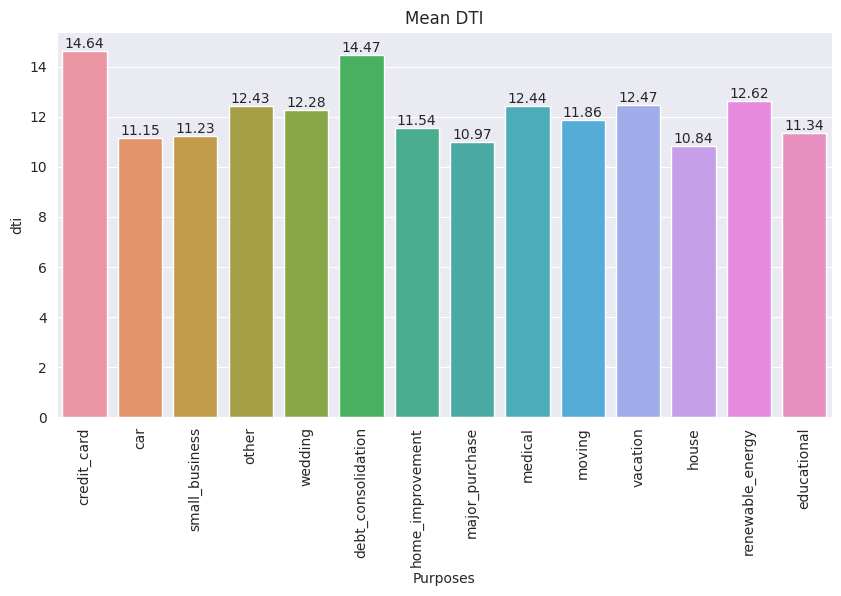

In [171]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=data_df, x='purpose', y='dti', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0], fmt="{0:.2f}")
plt.title("Mean DTI")
plt.xlabel("Purposes")
plt.xticks(rotation=90)
plt.show()

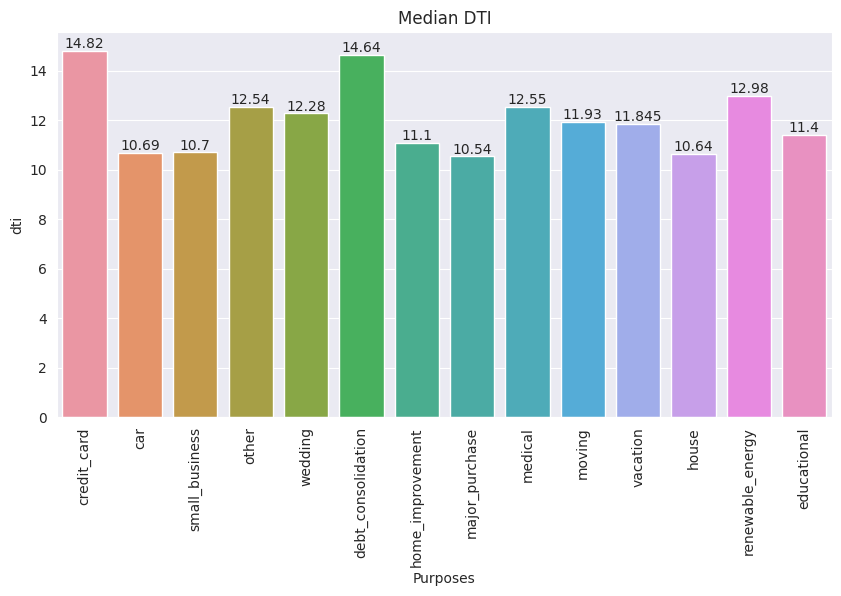

In [172]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=data_df, x='purpose', y='dti', estimator='median', errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Median DTI")
plt.xlabel("Purposes")
plt.xticks(rotation=90)
plt.show()

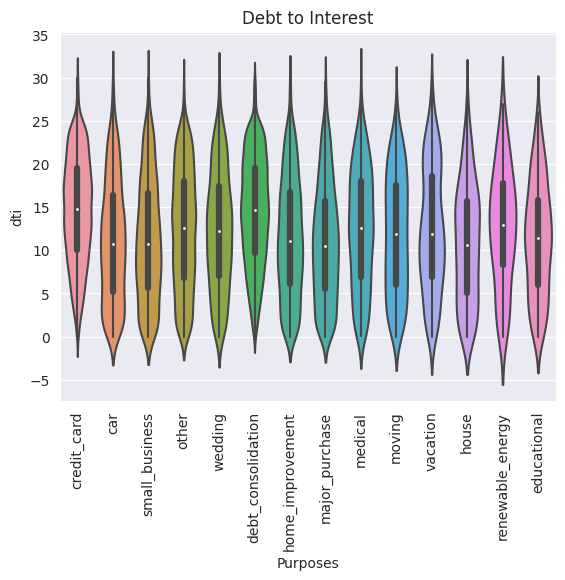

In [173]:
plt.figure()
sns.violinplot(data=data_df, x='purpose', y='dti')
# ax.bar_label(ax.containers[0])
plt.title("Debt to Interest")
plt.xlabel("Purposes")
plt.xticks(rotation=90)
plt.show()

#### Address State

In [174]:
a = data_df.groupby(['purpose', 'addr_state'])['id'].count().reset_index()
aa = a.groupby(['addr_state'])['id'].sum().reset_index()
a = a.merge(aa, how='inner', on='addr_state').drop_duplicates()
del aa
a.columns = ['purpose', 'addr_state', 'num_appln', 'total_state']
a['percent_state'] = a.num_appln * 100 / a.total_state
a = a.sort_values(by='total_state', ascending=False)
a.index = range(a.shape[0])
a

purpose addr_state  num_appln  total_state  percent_state
0                   car         CA        203         6001       3.382770
1               wedding         CA        147         6001       2.449592
2           credit_card         CA        886         6001      14.764206
3    debt_consolidation         CA       2874         6001      47.892018
4           educational         CA         43         6001       0.716547
5      home_improvement         CA        288         6001       4.799200
6                 house         CA         52         6001       0.866522
7        major_purchase         CA        289         6001       4.815864
8               medical         CA        116         6001       1.933011
9                moving         CA        106         6001       1.766372
10                other         CA        628         6001      10.464923
11     renewable_energy         CA         14         6001       0.233294
12       small_business         CA        277         6001       4.615897
13             vacation         CA         78         6001       1.299783
14                  car         NY        100         3143       3.181674
15              wedding         NY         99         3143       3.149857
16             vacation         NY         39         3143       1.240853
17          credit_card         NY        412         3143      13.108495
18   debt_consolidation         NY       1467         3143      46.675151
19          educational         NY         33         3143       1.049952
20     home_improvement         NY        172         3143       5.472479
21                house         NY         16         3143       0.509068
22       major_purchase         NY        168         3143       5.345212
23              medical         NY         47         3143       1.495387
24               moving         NY         71         3143       2.258988
25                other         NY        392         3143      12.472160
26     renewable_energy         NY          7         3143       0.222717
27       small_business         NY        120         3143       3.818008
28   debt_consolidation         FL       1053         2447      43.032284
29              wedding         FL         65         2447       2.656314
30          educational         FL         27         2447       1.103392
31     home_improvement         FL        209         2447       8.541071
32                house         FL         36         2447       1.471189
33       major_purchase         FL        157         2447       6.416020
34              medical         FL         45         2447       1.838987
35          credit_card         FL        291         2447      11.892113
36                  car         FL        106         2447       4.331835
37                other         FL        268         2447      10.952186
38     renewable_energy         FL          8         2447       0.326931
39       small_business         FL        121         2447       4.944830
40             vacation         FL         21         2447       0.858194
41               moving         FL         40         2447       1.634655
42       major_purchase         TX        142         2235       6.353468
43              medical         TX         51         2235       2.281879
44               moving         TX         29         2235       1.297539
45   debt_consolidation         TX        966         2235      43.221477
46             vacation         TX         19         2235       0.850112
47       small_business         TX        108         2235       4.832215
48     renewable_energy         TX          9         2235       0.402685
49                other         TX        246         2235      11.006711
50                  car         TX        110         2235       4.921700
51          credit_card         TX        298         2235      13.333333
52          educational         TX         16         2235       0.715884
53     home_improvem

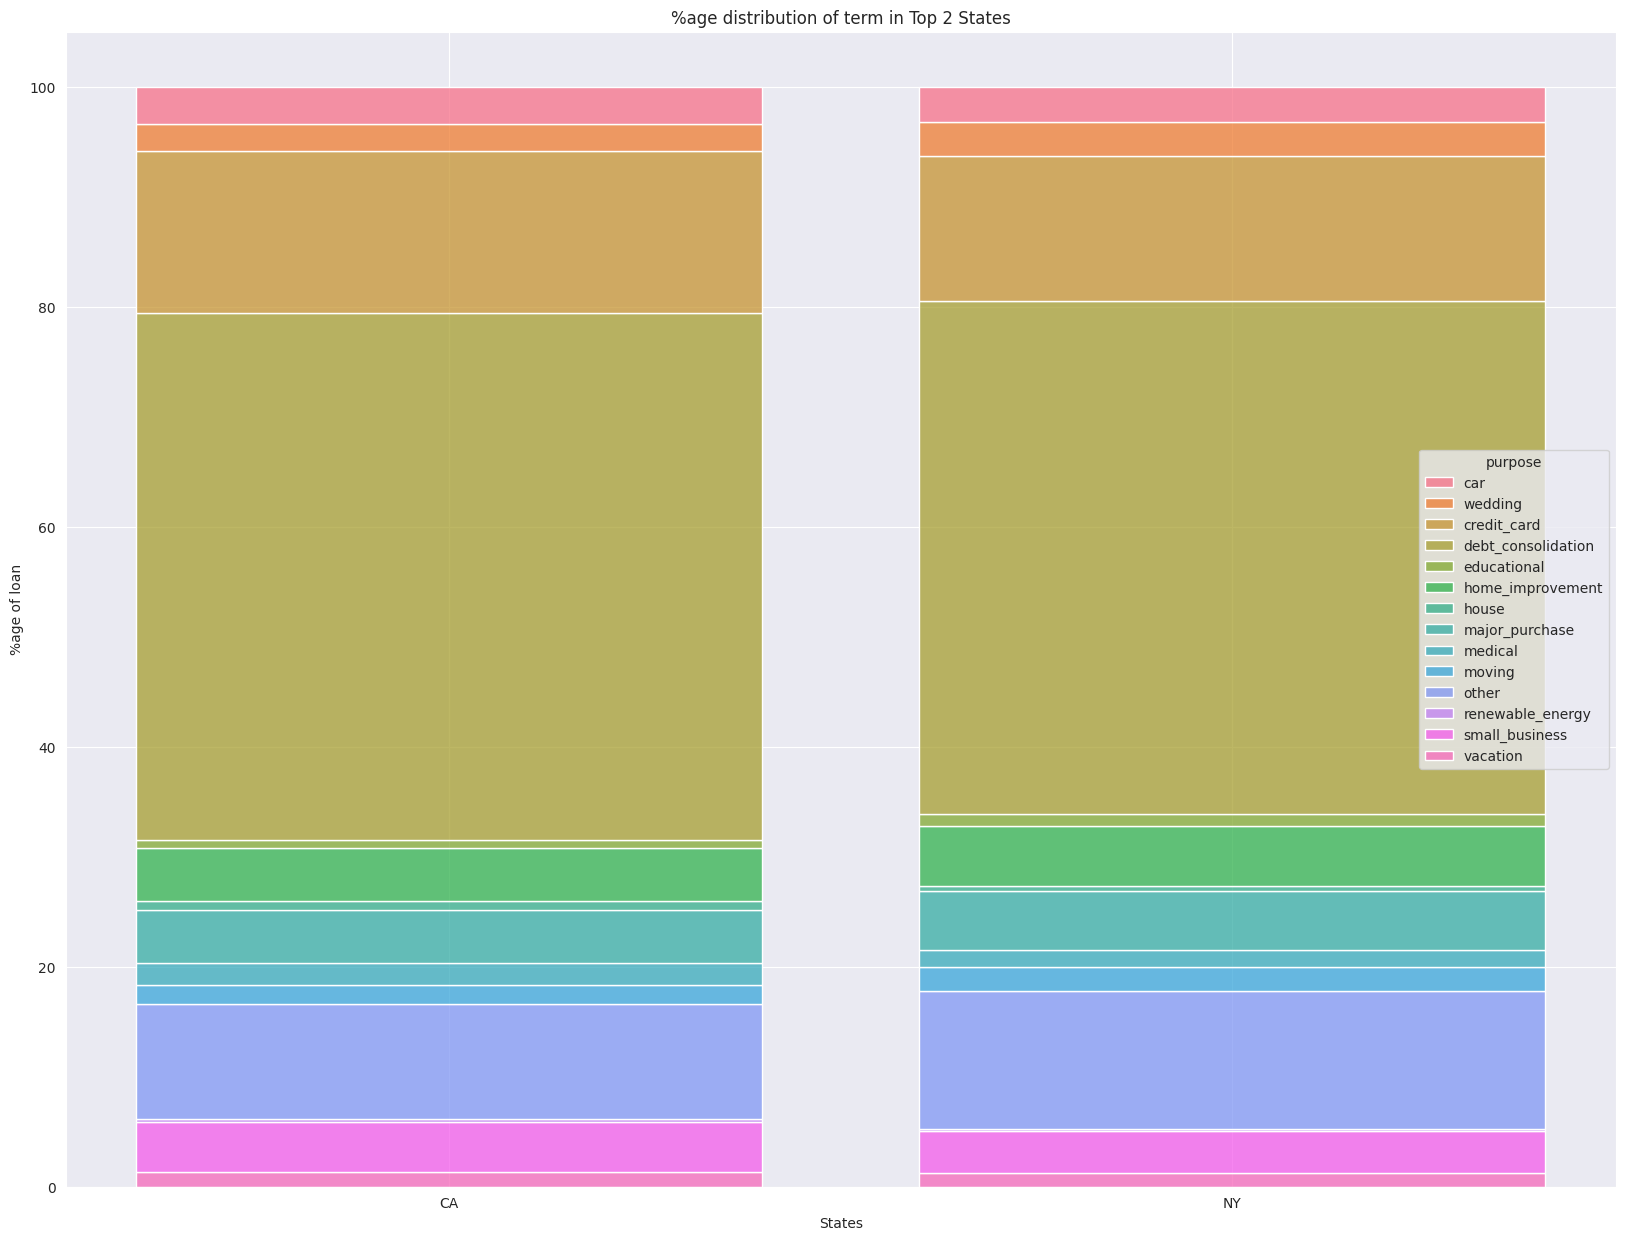

In [175]:
plt.figure(figsize=(20, 15))
# ax = sns.barplot(data=a.iloc[:10], x='addr_state', y='percent_state', hue='purpose')
# ax.bar_label(ax.containers[0], fmt="{:0.1f}%")
# ax.bar_label(ax.containers[1], fmt="{:0.1f}%")
sns.histplot(data=a.iloc[:28], x='addr_state', weights='percent_state',
             hue='purpose', multiple='stack', shrink=0.8)
plt.title('%age distribution of term in Top 2 States')
plt.xlabel('States')
plt.ylabel('%age of loan')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# del a

#### Home Ownership

In [176]:
a = data_df.groupby(['purpose', 'home_ownership'])['id'].count().reset_index()
aa = a.groupby(['home_ownership'])['id'].sum().reset_index()
a = a.merge(aa, how='inner', on='home_ownership').drop_duplicates()
del aa
a.columns = ['purpose', 'home_ownership', 'num_appln', 'total_per_purpose']
a['percent_purpose'] = a.num_appln * 100 / a.total_per_purpose
a = a.sort_values(by=['total_per_purpose', 'purpose'], ascending=[False, True])
a = a[['purpose', 'home_ownership', 'percent_purpose']]

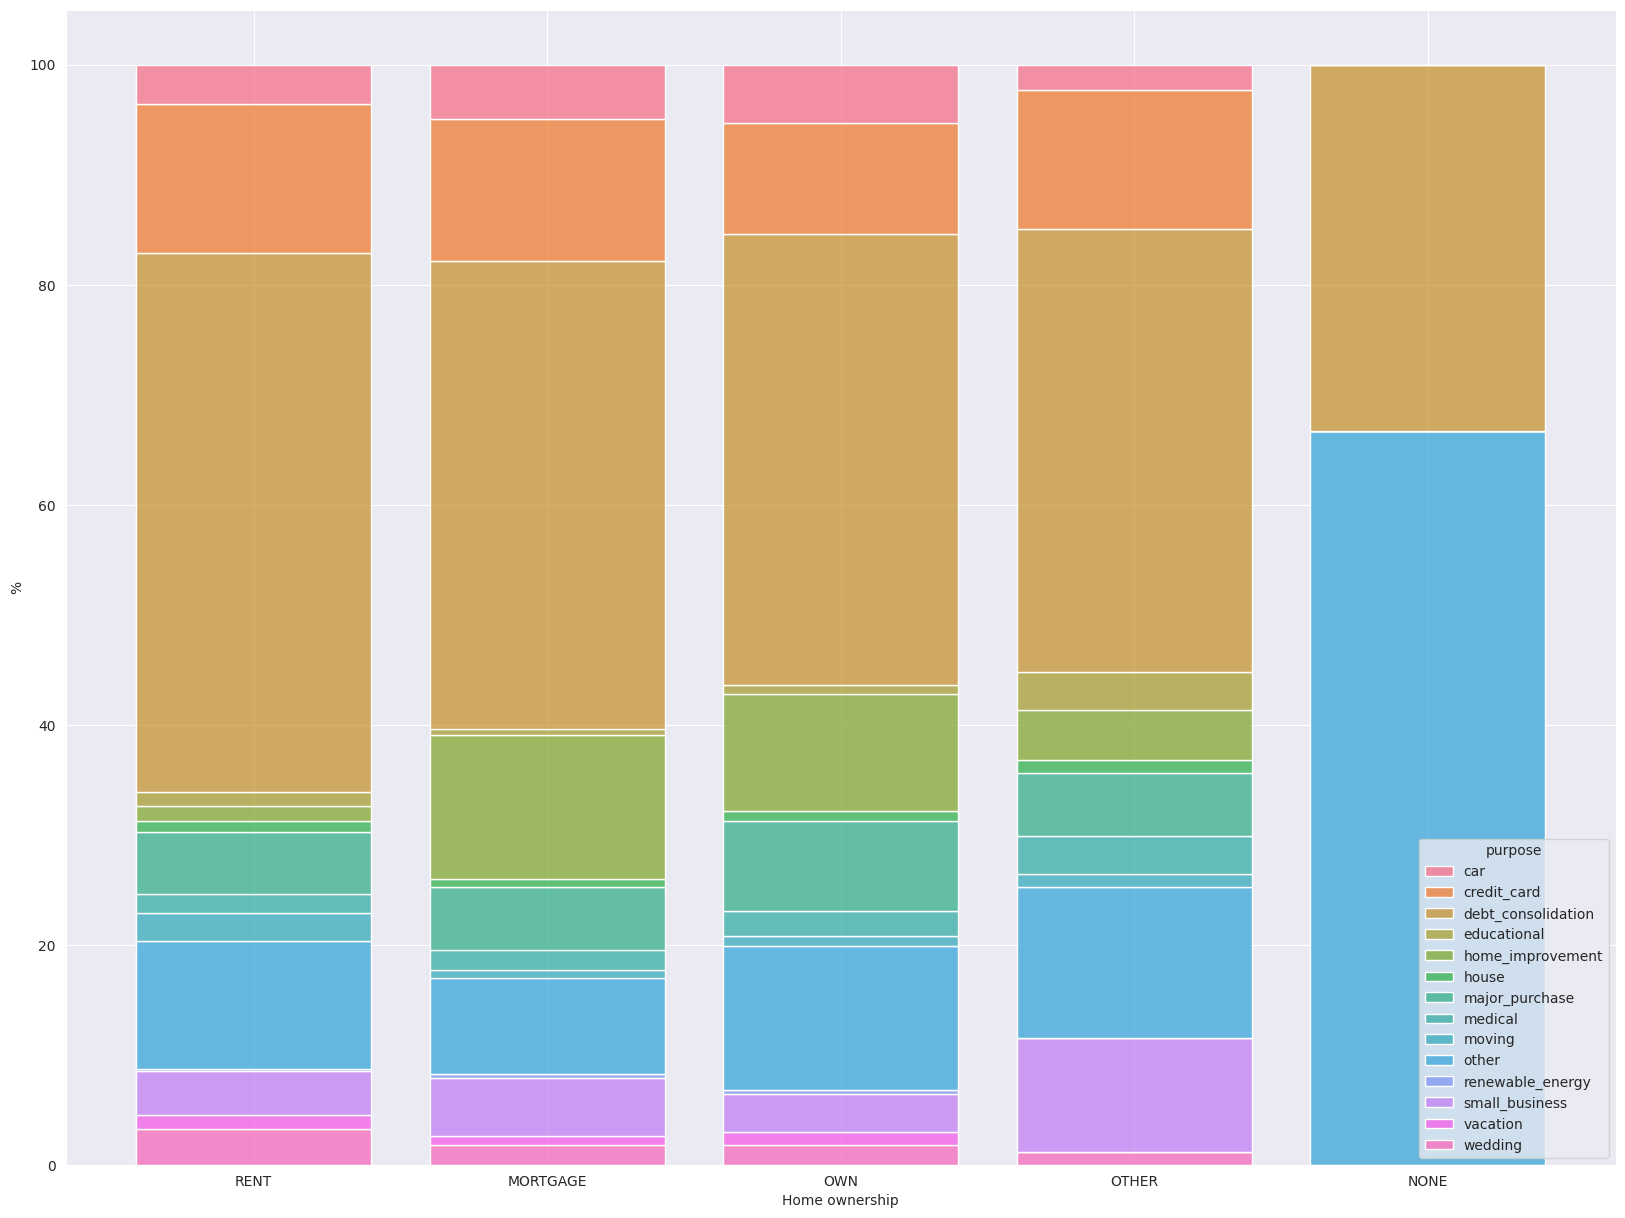

In [177]:
plt.figure(figsize=(20, 15))
sns.histplot(data=a, x='home_ownership', weights='percent_purpose', hue='purpose', multiple='stack', shrink=0.8)
plt.xlabel("Home ownership")
plt.ylabel('%')
plt.title("")
plt.show()

#### Reloving Utilization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

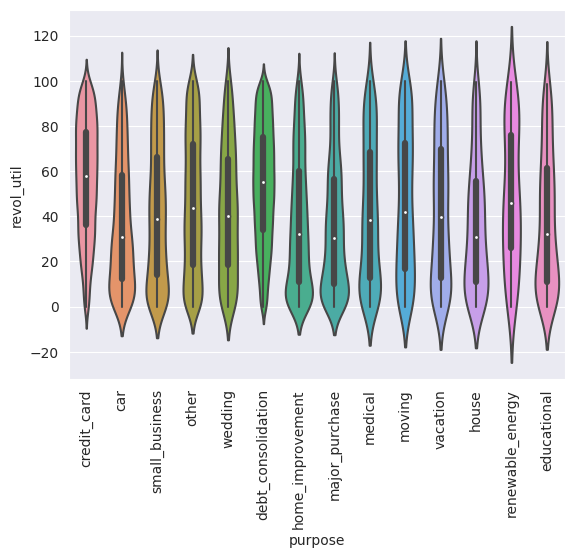

In [178]:
sns.violinplot(data=data_df, x='purpose', y='revol_util')
plt.xticks(rotation=90)

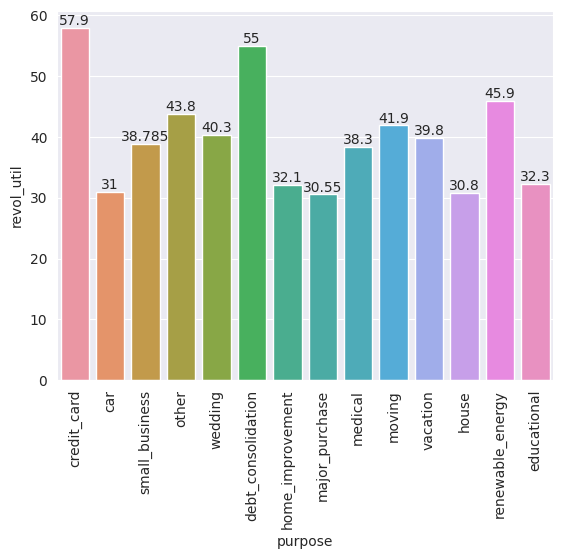

In [179]:
ax = sns.barplot(data=data_df, x='purpose', y='revol_util', estimator='median', errorbar=None)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

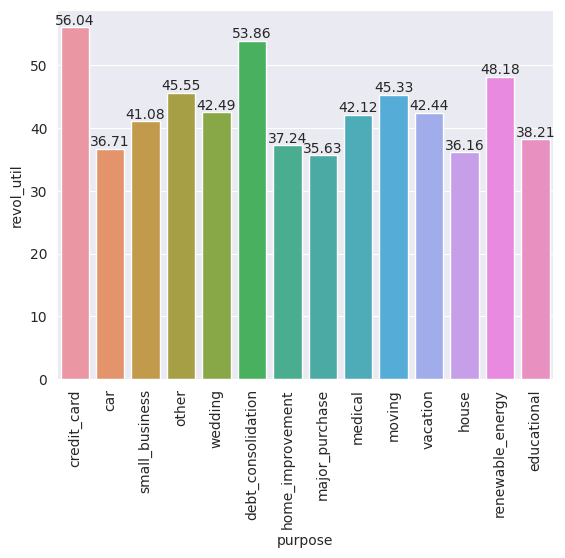

In [180]:
ax = sns.barplot(data=data_df, x='purpose', y='revol_util', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0], fmt="{0:.2f}")
plt.xticks(rotation=90)
plt.show()

#### Annual Income

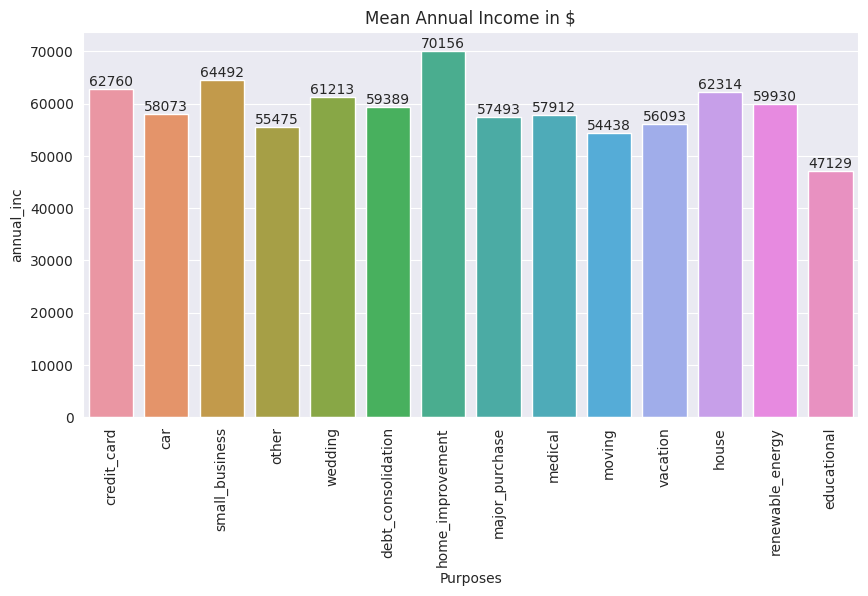

In [181]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=data_df, x='purpose', y='annual_inc', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0], fmt="{0:.0f}")
plt.title("Mean Annual Income in $")
plt.xlabel("Purposes")
plt.xticks(rotation=90)
plt.show()

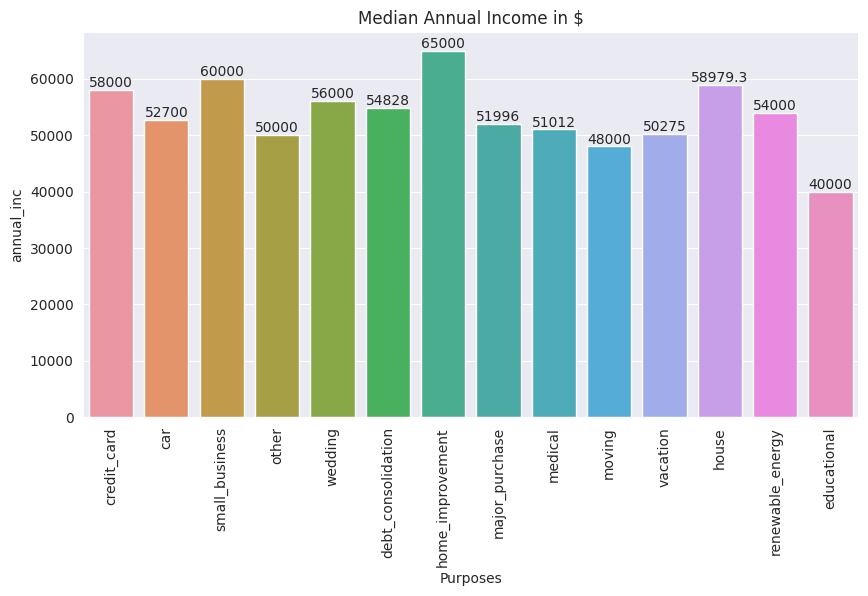

In [182]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=data_df, x='purpose', y='annual_inc', estimator='median', errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Median Annual Income in $")
plt.xlabel("Purposes")
plt.xticks(rotation=90)
plt.show()

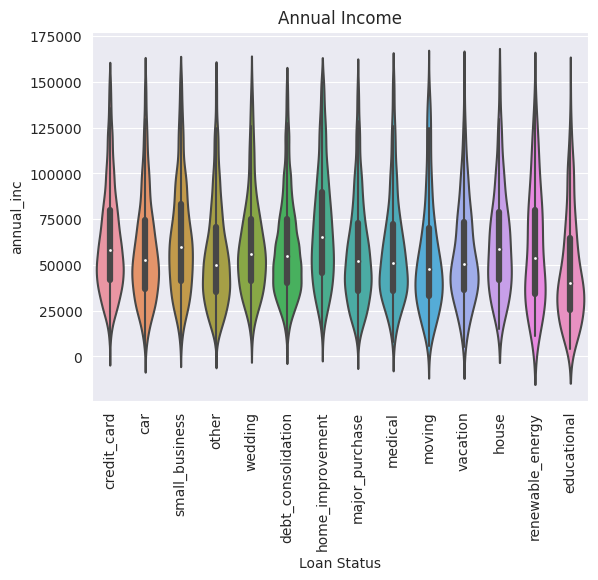

In [183]:
plt.figure()
sns.violinplot(data=data_df, x='purpose', y='annual_inc')
# ax.bar_label(ax.containers[0])
plt.title("Annual Income")
plt.xlabel("Loan Status")
plt.xticks(rotation=90)
plt.show()

## Step 4: Bi-variate Analysis

Based on the univariate and segemented univariate analysis, we selected the few columns.

In [184]:
data_driver_df = data_df[['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
                   'loan_status', 'term', 'int_rate', 'annual_inc',
                   'purpose', 'revol_util',]]

In [185]:
data_driver_df.head(3)

id  loan_amnt  funded_amnt  funded_amnt_inv  loan_status  term   
0  1077501       5000         5000           4975.0   Fully Paid    36  \
1  1077430       2500         2500           2500.0  Charged Off    60   
2  1077175       2400         2400           2400.0   Fully Paid    36   

   int_rate  annual_inc         purpose  revol_util  
0     10.65     24000.0     credit_card        83.7  
1     15.27     30000.0             car         9.4  
2     15.96     12252.0  small_business        98.5

In [186]:
loan_labels = {k: v for k, v in enumerate(sorted(data_driver_df.loan_status.unique()))}
loan_labels_inv = {v: k for k, v in loan_labels.items()}
purpose_labels = {k: v for k, v in enumerate(sorted(data_driver_df.purpose.unique()))}
purpose_labels_inv = {v: k for k, v in purpose_labels.items()}
term_labels = {k: v for k, v in enumerate(sorted(data_driver_df.term.unique()))}
term_labels_inv = {v: k for k, v in term_labels.items()}

In [187]:
data_driver_df['loan_status'] = data_driver_df.loan_status.apply(lambda x: loan_labels_inv[x])
data_driver_df['term'] = data_driver_df.term.apply(lambda x: term_labels_inv[x])
data_driver_df['purpose'] = data_driver_df.purpose.apply(lambda x: purpose_labels_inv[x])

In [188]:
data_driver_df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  loan_status  term   
0  1077501       5000         5000           4975.0            1     0  \
1  1077430       2500         2500           2500.0            0     1   
2  1077175       2400         2400           2400.0            1     0   
3  1076863      10000        10000          10000.0            1     0   
5  1075269       5000         5000           5000.0            1     0   

   int_rate  annual_inc  purpose  revol_util  
0     10.65     24000.0        1        83.7  
1     15.27     30000.0        0         9.4  
2     15.96     12252.0       11        98.5  
3     13.49     49200.0        9        21.0  
5      7.90     36000.0       13        28.3

In [189]:
data_corr = data_driver_df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
                            'term', 'int_rate', 'annual_inc', 'purpose',
                            'revol_util']].corr()

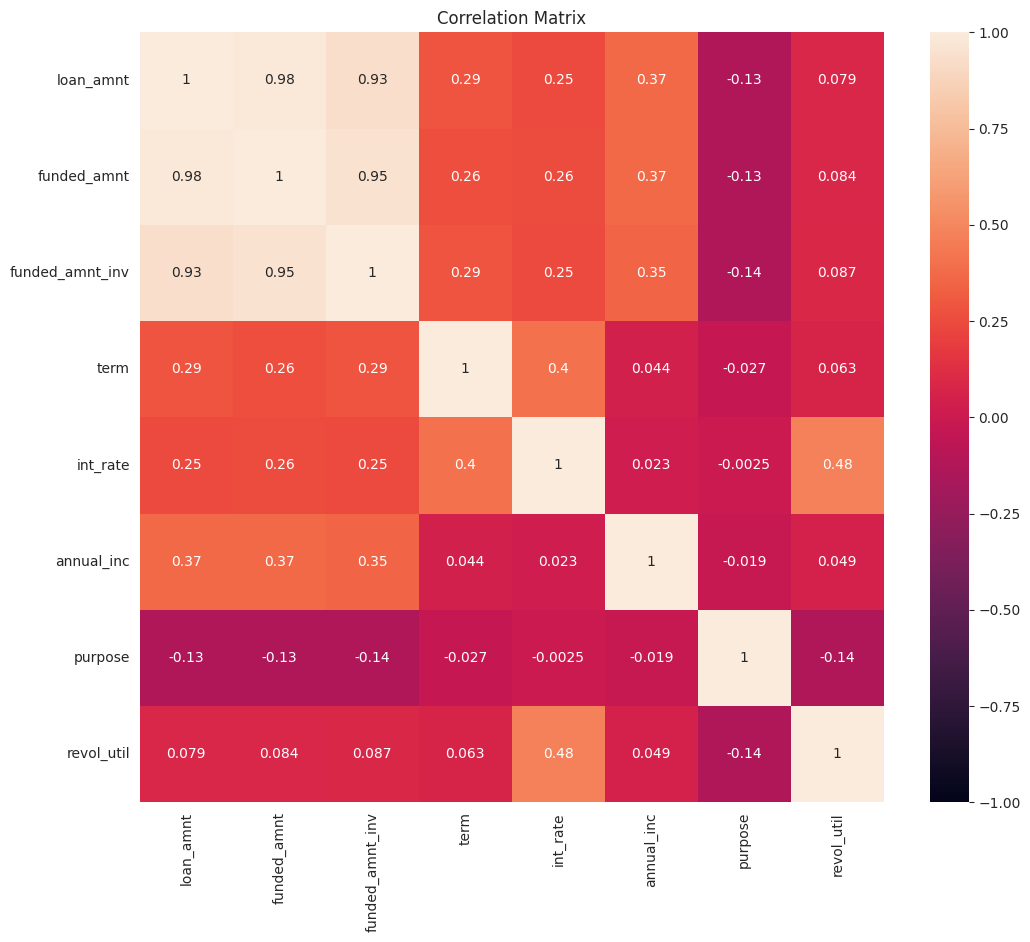

In [190]:
plt.figure(figsize=(12, 10))
plt.title("Correlation Matrix")
sns.heatmap(data_corr, annot=True, vmin =-1, vmax=1)
plt.show()

## Conclusion

We conducted our analysis on the loan dataset provided by Lending Club to identify the factors that drive the risk of loans. We followed multiple steps and eliminated variables as when necessary. At last we conducted the bivariate analysis, comparing each variable to another and we conclude the following:
- Loan Amount is an important driving factor. It is highly correlated to Funded Amount and Investor Funded  Amount
    - This is obvious as the loan application if approved will only approve the amount asked by the borrower and investors will only invest accordingly
    - Therefore we are choosing to keep only Loan Amount as the factor
- The factors ‘Revolving Utilisation of the credit accounts’  and ‘Interest Rates’  also show a slight positive correlation
- ‘Interest Rate’ also show a slight positive correlation to ‘Term’ of the loan
- ‘Annual Income’ of the borrower and ‘Purpose’ of the loan are also the factors we chose, which drive the risk of a loan
